<a href="https://colab.research.google.com/github/annettembeyu/unsupervised-learning-techniques-in-R/blob/main/Moringa_School_DSC_Dimensionality_Reduction_week14_Annette_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carre Four Sales Analysis



## Defining the Research Question


*   Identify the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 
*   Understand the trend in the product sales.




## Context

The project entails analysing sales data from Carrefour Kenya that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 

## Metric of Success

The research will have achieved its objective when:

*  most relevant and effective strategies are identified that will lead to the highest number of sales possible.

## Details of the data

The dataset has 1000 rows and 16 columns. The attributes in the data are as follows:

 * invoice_id             
 * branch                
 * customer_type         
 * gender                
 * product_line           
 * accessories
 * unit_price             
 * quantity              
 * tax                   
 * date                  
 * time                   
 * payment               
 * cogs                   
 * gross_margin_percentage
 * gross_income          
 * rating                 
 * total   

The target variable being Total price for the product(including tax). 

## Data appropriateness

The information gathered is appropriate to make forecast on the sales so as to come up with the best strategies.

## Experimental Design

*  Loading and previewing the dataset 
*  Data Description
*  Data Cleaning;
Anomalies in the data(find and deal with them):
   *  Missing values.
   *  Outliers.
   *  Duplicates.
*  Univariate Graphical Exploratory Data Analysis
*  Bivariate Graphical Exploratory Data Analysis
* Implementing the Solution
  *  Dimensionality reduction using the t-SNE algorithm or PCA
  *  Feature selection
*  Challenging the Solution
*  Conclusion
*  Recommendation   

## Loading and previewing the dataset 

In [ ]:
# Loading the relevant library necessary to read the data in the correct format
install.packages("tidyverse")
install.packages("modelr")
install.packages("broom")
install.packages("readr")
install.packages("lubridate")
install.packages("data.table", dependencies= TRUE)
library(tidyverse)  # data manipulation and visualization
library(modelr)     # provides easy pipeline modeling functions
library(broom)      # helps to tidy up model outputs
library(readr)      # helps in reading data in r
library(lubridate)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [100]:
# Loading the dataset
super_df <- read_csv(file = "Supermarket_Dataset_1 - Sales Data.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  `Invoice ID` = col_character(),
  Branch = col_character(),
  `Customer type` = col_character(),
  Gender = col_character(),
  `Product line` = col_character(),
  `Unit price` = col_double(),
  Quantity = col_double(),
  Tax = col_double(),
  Date = col_character(),
  Time = col_time(format = ""),
  Payment = col_character(),
  cogs = col_double(),
  `gross margin percentage` = col_double(),
  `gross income` = col_double(),
  Rating = col_double(),
  Total = col_double()
)




In [101]:
# Changing the column names to a suitable format
names(super_df) <- str_replace_all(names(super_df), c(" " = "_"))
names(super_df) <- tolower(names(super_df))

In [102]:
# previewing the dataset by looking at the first 6 rows
head(super_df)

invoice_id  branch customer_type gender product_line           unit_price
1 750-67-8428 A      Member        Female Health and beauty      74.69     
2 226-31-3081 C      Normal        Female Electronic accessories 15.28     
3 631-41-3108 A      Normal        Male   Home and lifestyle     46.33     
4 123-19-1176 A      Member        Male   Health and beauty      58.22     
5 373-73-7910 A      Normal        Male   Sports and travel      86.31     
6 699-14-3026 C      Normal        Male   Electronic accessories 85.39     
  quantity tax     date      time     payment     cogs  
1 7        26.1415 1/5/2019  13:08:00 Ewallet     522.83
2 5         3.8200 3/8/2019  10:29:00 Cash         76.40
3 7        16.2155 3/3/2019  13:23:00 Credit card 324.31
4 8        23.2880 1/27/2019 20:33:00 Ewallet     465.76
5 7        30.2085 2/8/2019  10:37:00 Ewallet     604.17
6 7        29.8865 3/25/2019 18:30:00 Ewallet     597.73
  gross_margin_percentage gross_income rating total   
1 4.761905                26.1415      9.1    548.9715
2 4.761905                 3.8200      9.6     80.2200
3 4.761905                16.2155      7.4    340.5255
4 4.761905                23.2880      8.4    489.0480
5 4.761905                30.2085      5.3    634.3785
6 4.761905                29.8865      4.1    627.6165

In [103]:
# Looking at the tail of the dataset(last 6 rows of the dataset)
tail(super_df)

invoice_id  branch customer_type gender product_line           unit_price
1 652-49-6720 C      Member        Female Electronic accessories 60.95     
2 233-67-5758 C      Normal        Male   Health and beauty      40.35     
3 303-96-2227 B      Normal        Female Home and lifestyle     97.38     
4 727-02-1313 A      Member        Male   Food and beverages     31.84     
5 347-56-2442 A      Normal        Male   Home and lifestyle     65.82     
6 849-09-3807 A      Member        Female Fashion accessories    88.34     
  quantity tax     date      time     payment cogs   gross_margin_percentage
1  1        3.0475 2/18/2019 11:40:00 Ewallet  60.95 4.761905               
2  1        2.0175 1/29/2019 13:46:00 Ewallet  40.35 4.761905               
3 10       48.6900 3/2/2019  17:16:00 Ewallet 973.80 4.761905               
4  1        1.5920 2/9/2019  13:22:00 Cash     31.84 4.761905               
5  1        3.2910 2/22/2019 15:33:00 Cash     65.82 4.761905               
6  7       30.9190 2/18/2019 13:28:00 Cash    618.38 4.761905               
  gross_income rating total    
1  3.0475      5.9      63.9975
2  2.0175      6.2      42.3675
3 48.6900      4.4    1022.4900
4  1.5920      7.7      33.4320
5  3.2910      4.1      69.1110
6 30.9190      6.6     649.2990

In [104]:
# picking a random sample of the data
sample(super_df)

gender invoice_id  gross_margin_percentage rating gross_income time    
1    Female 750-67-8428 4.761905                9.1    26.1415      13:08:00
2    Female 226-31-3081 4.761905                9.6     3.8200      10:29:00
3    Male   631-41-3108 4.761905                7.4    16.2155      13:23:00
4    Male   123-19-1176 4.761905                8.4    23.2880      20:33:00
5    Male   373-73-7910 4.761905                5.3    30.2085      10:37:00
6    Male   699-14-3026 4.761905                4.1    29.8865      18:30:00
7    Female 355-53-5943 4.761905                5.8    20.6520      14:36:00
8    Female 315-22-5665 4.761905                8.0    36.7800      11:38:00
9    Female 665-32-9167 4.761905                7.2     3.6260      17:15:00
10   Female 692-92-5582 4.761905                5.9     8.2260      13:27:00
11   Female 351-62-0822 4.761905                4.5     2.8960      18:07:00
12   Male   529-56-3974 4.761905                6.8     5.1020      17:03:00
13   Female 365-64-0515 4.761905                7.1    11.7375      10:25:00
14   Male   252-56-2699 4.761905                8.2    21.5950      16:48:00
15   Female 829-34-3910 4.761905                5.7    35.6900      19:21:00
16   Female 299-46-1805 4.761905                4.5    28.1160      16:19:00
17   Female 656-95-9349 4.761905                4.6    24.1255      11:03:00
18   Male   765-26-6951 4.761905                6.9    21.7830      10:39:00
19   Male   329-62-1586 4.761905                8.6     8.2005      18:00:00
20   Female 319-50-3348 4.761905                4.4     4.0300      15:30:00
21   Male   300-71-4605 4.761905                4.8    21.5100      11:24:00
22   Male   371-85-5789 4.761905                5.1    13.1970      10:40:00
23   Male   273-16-6619 4.761905                4.4     3.3200      12:20:00
24   Male   636-48-8204 4.761905                9.9     8.6400      11:15:00
25   Male   549-59-1358 4.761905                6.0    13.2945      17:36:00
26   Female 227-03-5010 4.761905                8.5    21.0360      19:20:00
27   Male   649-29-6775 4.761905                6.7     1.6760      15:31:00
28   Female 189-17-4241 4.761905                7.7     8.7670      12:17:00
29   Female 145-94-9061 4.761905                9.6    22.0900      19:48:00
30   Male   848-62-7243 4.761905                7.4    11.2005      15:36:00
⋮    ⋮      ⋮           ⋮                       ⋮      ⋮            ⋮       
971  Female 746-04-1077 4.761905                9.0    42.3150      11:36:00
972  Male   448-34-8700 4.761905                6.7    12.9185      13:51:00
973  Male   452-04-8808 4.761905                5.5    30.4780      15:17:00
974  Male   531-56-4728 4.761905                5.4    12.0120      15:29:00
975  Male   744-82-9138 4.761905                8.2     8.6130      17:59:00
976  Male   883-69-1285 4.761905                7.0     4.9920      11:55:00
977  Female 221-25-5073 4.761905                8.5    14.9320      10:39:00
978  Male   518-71-6847 4.761905                4.9     7.9800      15:10:00
979  Female 156-20-0370 4.761905                5.1     1.2725      18:10:00
980  Female 151-33-7434 4.761905                6.5     3.3885      20:43:00
981  Male   728-47-9078 4.761905                9.8    11.9180      12:46:00
982  Male   809-46-1866 4.761905                8.4    11.6300      17:44:00
983  Female 139-32-4183 4.761905                7.4    43.8660      14:19:00
984  Male   148-41-7930 4.761905                6.1    34.9860      10:33:00
985  Male   189-40-5216 4.761905                6.0    33.7295      11:40:00
986  Female 374-38-5555 4.761905                8.5    15.9275      19:30:00
987  Female 764-44-8999 4.761905                4.3     1.4760      14:42:00
988  Male   552-44-5977 4.761905                6.2    24.8000      19:08:00
989  Male   267-62-7380 4.761905                4.3    41.1700      19:12:00
990  Male   430-53-4718 4.761905                8.4    30.1480      15:46:00
9

In [105]:
# getting the column names in the data set
table(names(super_df))


                 branch                    cogs           customer_type 
                      1                       1                       1 
                   date                  gender            gross_income 
                      1                       1                       1 
gross_margin_percentage              invoice_id                 payment 
                      1                       1                       1 
           product_line                quantity                  rating 
                      1                       1                       1 
                    tax                    time                   total 
                      1                       1                       1 
             unit_price 
                      1 

 ## Data Description

In [107]:
# changing the date column into the right format
super_df$date <- as.Date(super_df$date)

In [108]:
# previewing the dataset to get the details
print('The datatypes of the attributes in the dataset:');str(super_df)
print('The number of columns and rows consecutively are:');dim(super_df)
print('The format of the dataset:');class(super_df)

[1] "The datatypes of the attributes in the dataset:"
tibble [1,000 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ invoice_id             : chr [1:1000] "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ branch                 : chr [1:1000] "A" "C" "A" "A" ...
 $ customer_type          : chr [1:1000] "Member" "Normal" "Normal" "Member" ...
 $ gender                 : chr [1:1000] "Female" "Female" "Male" "Male" ...
 $ product_line           : chr [1:1000] "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ unit_price             : num [1:1000] 74.7 15.3 46.3 58.2 86.3 ...
 $ quantity               : num [1:1000] 7 5 7 8 7 7 6 10 2 3 ...
 $ tax                    : num [1:1000] 26.14 3.82 16.22 23.29 30.21 ...
 $ date                   : Date[1:1000], format: "1-05-20" "3-08-20" ...
 $ time                   : 'hms' num [1:1000] 13:08:00 10:29:00 13:23:00 20:33:00 ...
  ..- attr(*, "units")= chr "secs"
 $ payment                : c

[1] 1000   16

[1] "The format of the dataset:"


[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

The dataset has 1000 rows and 16 columns and it is in dataframe format.

In [109]:
# summary of the different data types in the dataset
table(unlist(lapply(super_df, class)))


character      Date  difftime       hms   numeric 
        6         1         1         1         8 

**Observation**: In summary the dataset has six(6) attributes which have the character datatype, one(1) being difftime, eight(8) are numeric, one (1) date format.

In [110]:
# subsetting to get the nuerical columns only
numerics <- super_df[, c(6,7,8, 12:16)]
head(numerics)

unit_price quantity tax     cogs   gross_margin_percentage gross_income
1 74.69      7        26.1415 522.83 4.761905                26.1415     
2 15.28      5         3.8200  76.40 4.761905                 3.8200     
3 46.33      7        16.2155 324.31 4.761905                16.2155     
4 58.22      8        23.2880 465.76 4.761905                23.2880     
5 86.31      7        30.2085 604.17 4.761905                30.2085     
6 85.39      7        29.8865 597.73 4.761905                29.8865     
  rating total   
1 9.1    548.9715
2 9.6     80.2200
3 7.4    340.5255
4 8.4    489.0480
5 5.3    634.3785
6 4.1    627.6165

In [111]:
# Statistical summaries for the numerical columns
summary(numerics)

   unit_price       quantity          tax               cogs       
 Min.   :10.08   Min.   : 1.00   Min.   : 0.5085   Min.   : 10.17  
 1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249   1st Qu.:118.50  
 Median :55.23   Median : 5.00   Median :12.0880   Median :241.76  
 Mean   :55.67   Mean   : 5.51   Mean   :15.3794   Mean   :307.59  
 3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453   3rd Qu.:448.90  
 Max.   :99.96   Max.   :10.00   Max.   :49.6500   Max.   :993.00  
 gross_margin_percentage  gross_income         rating           total        
 Min.   :4.762           Min.   : 0.5085   Min.   : 4.000   Min.   :  10.68  
 1st Qu.:4.762           1st Qu.: 5.9249   1st Qu.: 5.500   1st Qu.: 124.42  
 Median :4.762           Median :12.0880   Median : 7.000   Median : 253.85  
 Mean   :4.762           Mean   :15.3794   Mean   : 6.973   Mean   : 322.97  
 3rd Qu.:4.762           3rd Qu.:22.4453   3rd Qu.: 8.500   3rd Qu.: 471.35  
 Max.   :4.762           Max.   :49.6500   Max.   :10.00

## Data Cleaning

### Missing values in the dataset

In [112]:
# Checking if there are any missing values in the dataset
is.na(super_df)

invoice_id branch customer_type gender product_line unit_price quantity
 [1,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [2,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [3,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [4,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [5,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [6,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [7,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [8,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
 [9,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[10,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[11,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[12,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[13,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[14,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[15,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[16,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[17,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[18,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[19,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[20,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[21,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[22,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[23,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[24,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[25,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[26,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[27,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[28,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[29,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[30,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[31,] ⋮          ⋮      ⋮             ⋮      ⋮            ⋮          ⋮       
[32,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[33,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[34,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[35,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[36,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[37,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[38,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[39,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[40,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[41,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[42,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[43,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[44,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[45,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[46,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[47,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[48,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[49,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[50,] FALSE      FALSE  FALSE         FALSE  FALSE        FALSE      FALSE   
[51,] FALSE      FALSE  FALS

In [113]:
# Obtaining the number of missing values in the data 
colSums(is.na(super_df))

invoice_id                  branch           customer_type 
                      0                       0                       0 
                 gender            product_line              unit_price 
                      0                       0                       0 
               quantity                     tax                    date 
                      0                       0                     587 
                   time                 payment                    cogs 
                      0                       0                       0 
gross_margin_percentage            gross_income                  rating 
                      0                       0                       0 
                  total 
                      0

***Observation*** There are no missing values in the dataset.

### Outlier detection and Removal

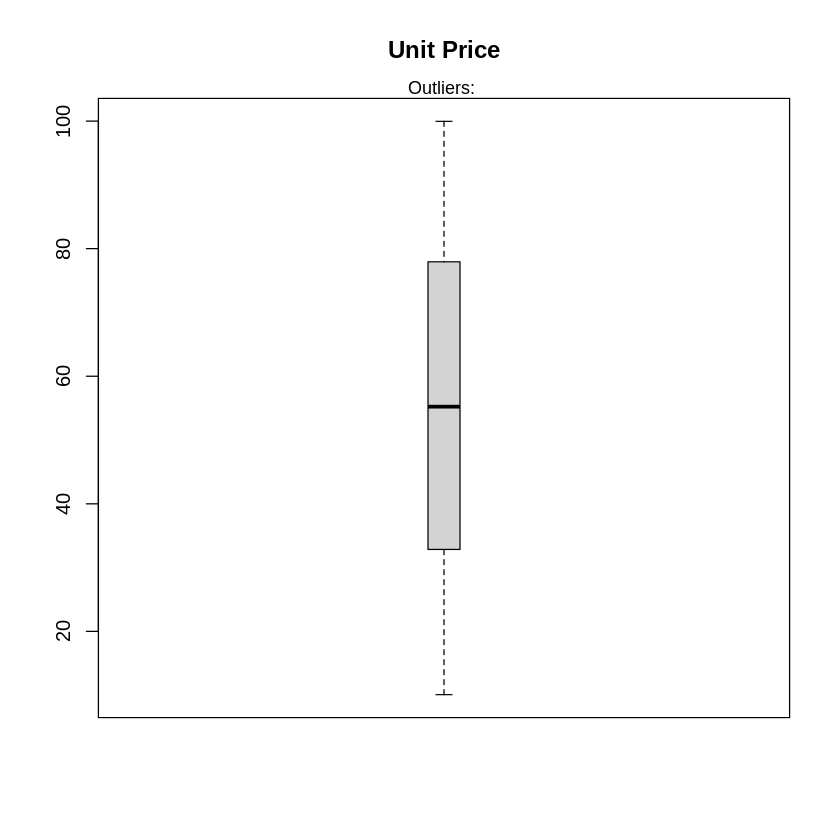

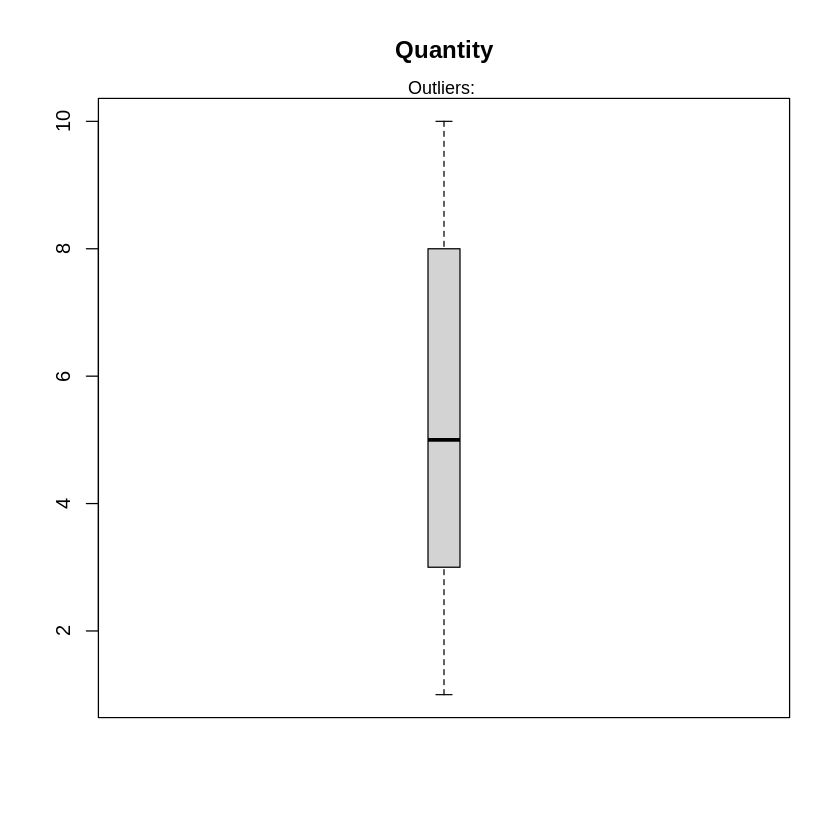

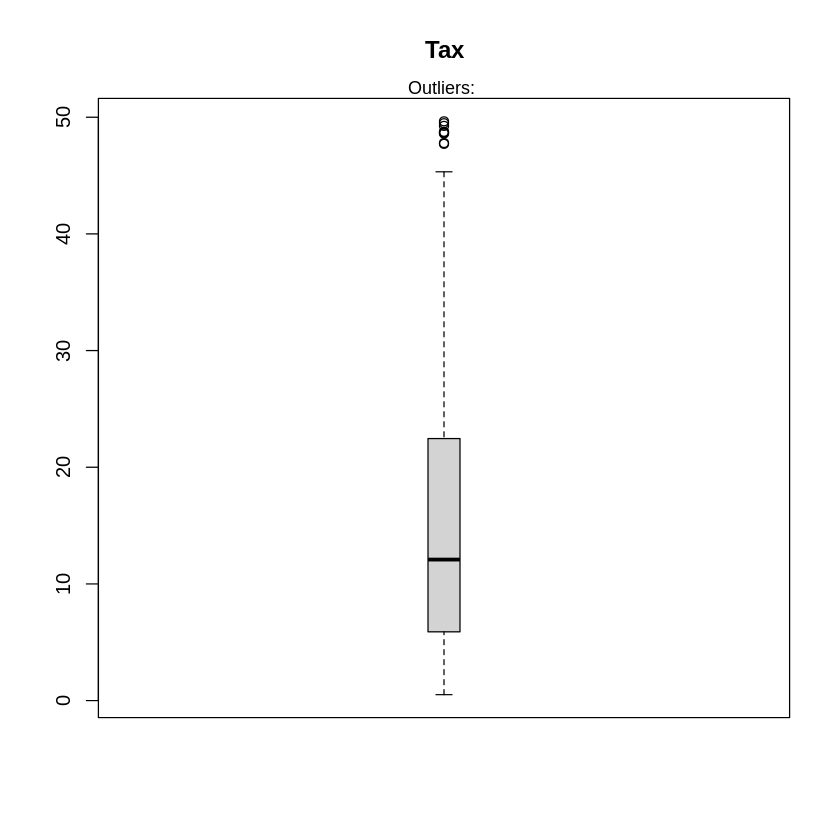

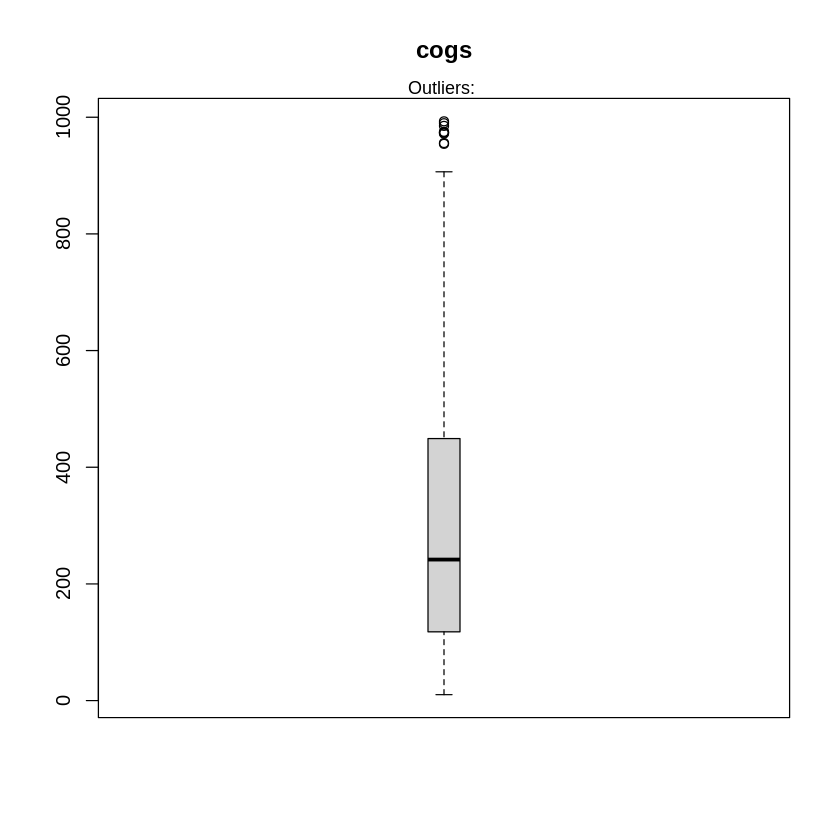

In [114]:
# visualise any existing outliers using boxplots
# Box plot for unit price
boxplot(super_df$unit_price, main="Unit Price", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for area quantity
boxplot(super_df$quantity, main="Quantity", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for tax
boxplot(super_df$tax, main="Tax", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for cogs
boxplot(super_df$cogs, main="cogs", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

**Observation**: Tax and Cogs column have a few outliers.

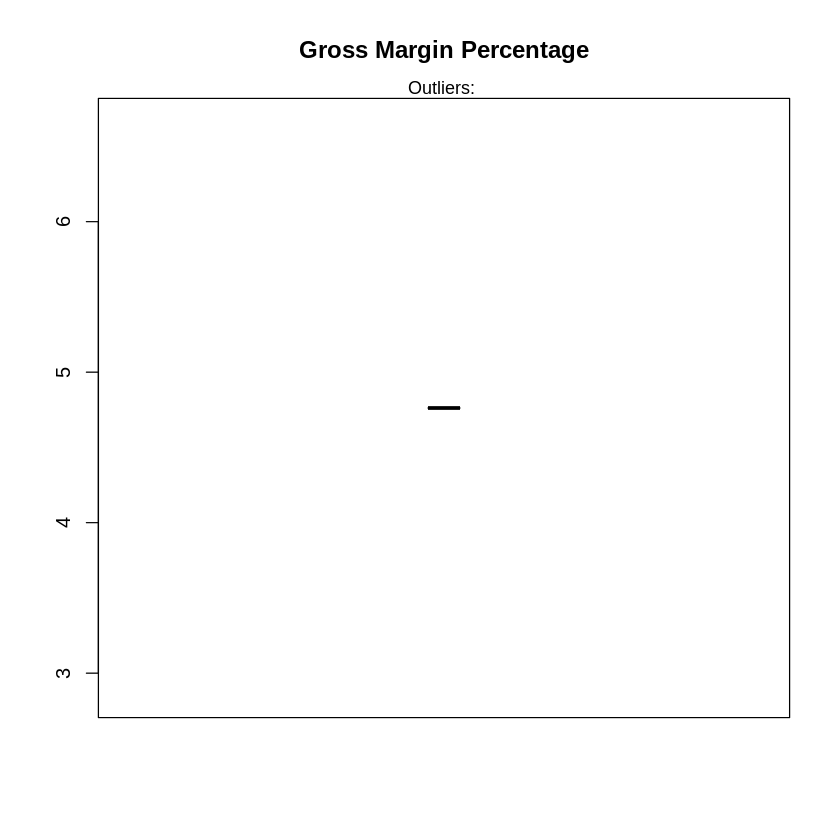

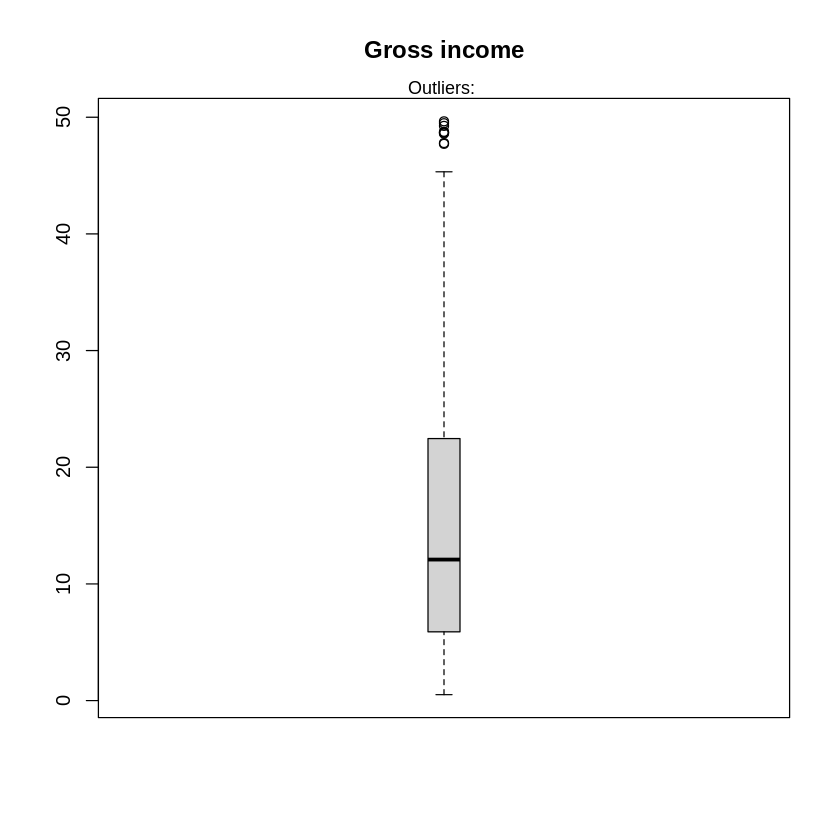

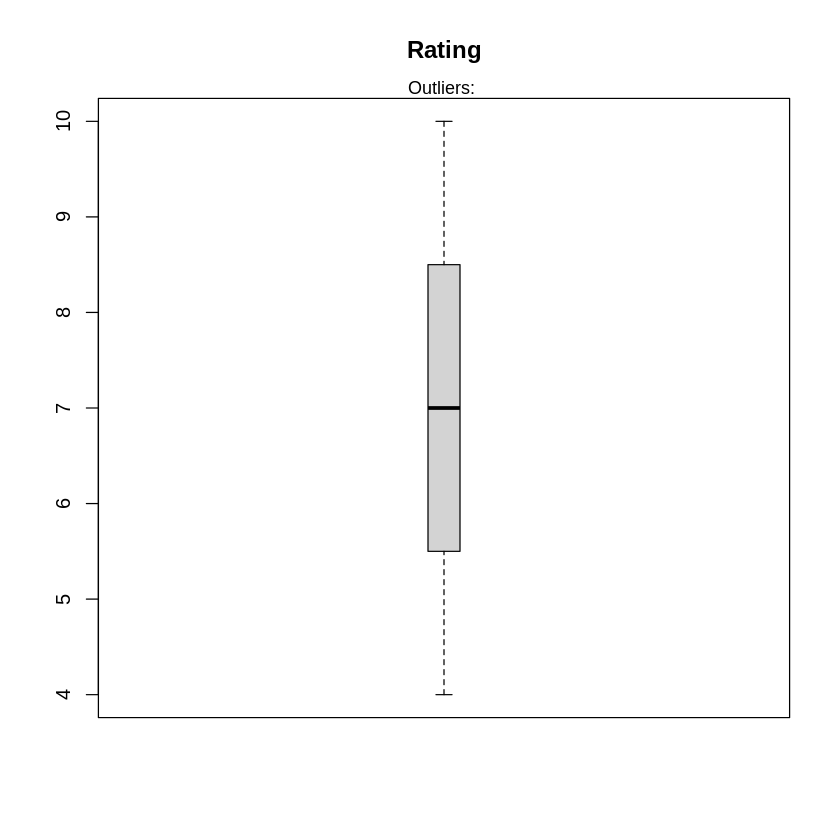

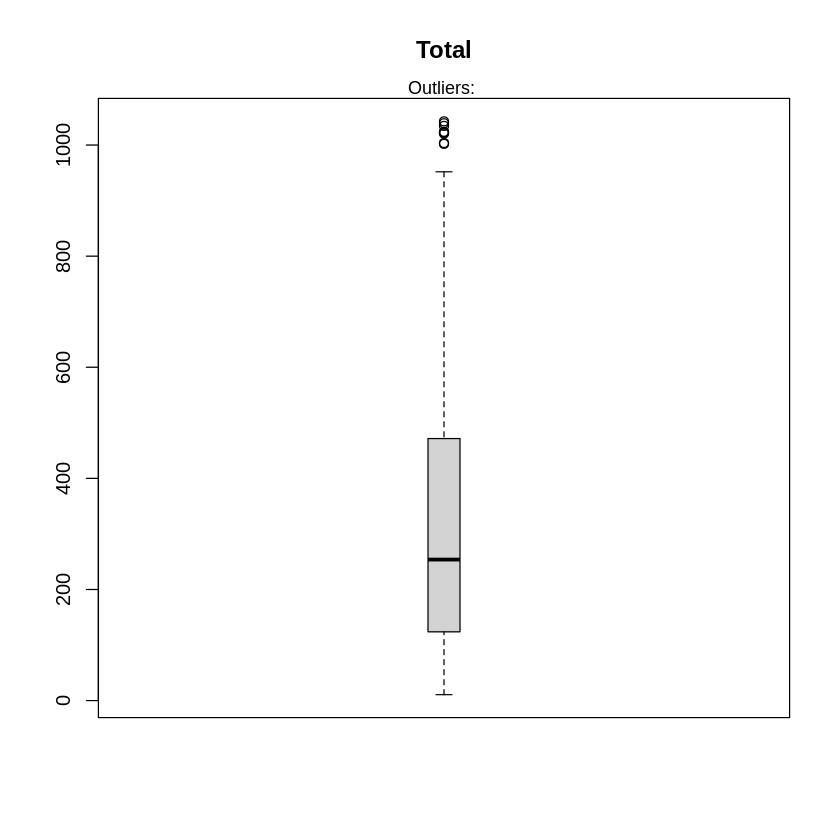

In [115]:
# visualise any existing outliers using boxplots
# Box plot for gross margin percentage
boxplot(super_df$gross_margin_percentage, main="Gross Margin Percentage", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for gross income
boxplot(super_df$gross_income, main="Gross income", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for rating
boxplot(super_df$rating, main="Rating", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for total
boxplot(super_df$total, main="Total", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

**Observation**: Gross income and total have a few outliers.

In [116]:
# Finding outiers in the dataset
print('Outlier values in Tax');boxplot.stats(super_df$tax)$out
print('Outlier values in Cogs');boxplot.stats(super_df$cogs)$out
print('Outlier values in Gross Income');boxplot.stats(super_df$gross_income)$out 
print('Outlier values in Total'); boxplot.stats(super_df$total)$out

[1] "Outlier values in Tax"


[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

[1] "Outlier values in Cogs"


[1] 955.8 989.8 993.0 954.4 972.1 985.2 975.0 973.7 973.8

[1] "Outlier values in Gross Income"


[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

[1] "Outlier values in Total"


[1] 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460 1023.750 1022.385
[9] 1022.490

In [117]:
# confirming where the outliers in tax came from
super_df$total[super_df$`tax` %in% c(47.79,49.49,49.65,47.72,48.605,49.26,48.75,48.685,48.69)]

[1] 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460 1023.750 1022.385
[9] 1022.490

**Observation**: From the output above, it is evident that a high amount in tax results to a subsequently high amount in the total price charged. It would not be necessary to remove these outliers since they will enable correct analysis and conclusion of the data.


In [118]:
# confirming where the outliers in cogs came from
super_df$unit_price[super_df$`cogs` %in% c(955.8,989.8,993,954.4,972.1,985.2,975,973.7,973.8)]

[1] 95.58 98.98 99.30 95.44 97.21 98.52 97.50 97.37 97.38

**Observation**: The outliers in cogs result to a high unit price this would be an important element to look at for analysis and conclusion of the data.

In [119]:
# confirming where the outliers in gross income came from
super_df$product_line[super_df$`gross_income` %in% c(47.79,49.49,49.65,47.72,48.605,49.26,48.75,48.685,48.69)]

[1] "Home and lifestyle"  "Fashion accessories" "Fashion accessories"
[4] "Sports and travel"   "Fashion accessories" "Food and beverages" 
[7] "Home and lifestyle"  "Home and lifestyle"  "Home and lifestyle"

**Observation**: The individuals earning a high gross income can afford luxiries such as fashion accessories, home and lifestyle, sports and travael hence these outliers will be very important in making analysis and conclusion.

In [120]:
# confirming where the outliers in total came from
super_df$gross_income[super_df$`total` %in% c(1003.59,1039.29,1042.65,1002.12,1020.705,1034.46,1023.75,1022.385,1022.49)]

[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

**Observation**: Products having a high total price were bought by individuals with a relatively high income. Hence it is necessary to inculde these outliers in analysis as they will result to important insights

### Detection and elimination of duplicates

In [121]:
# checking whether there are any duplicates in the data
table(duplicated(super_df))


FALSE 
 1000 

**Observation**; From the output it clearly indicates that there are no duplicates.

# Univariate Graphical Exploratory Data Analysis

### Measures of Central Tendency

In [122]:
# getting the mean for all numeric columns
print("The mean of the numeric attributes:")
lapply(numerics,FUN=mean)

[1] "The mean of the numeric attributes:"


$unit_price
[1] 55.67213

$quantity
[1] 5.51

$tax
[1] 15.37937

$cogs
[1] 307.5874

$gross_margin_percentage
[1] 4.761905

$gross_income
[1] 15.37937

$rating
[1] 6.9727

$total
[1] 322.9667

In [123]:
# getting the median for all numeric columns
print("The median of the numeric attributes:")
lapply(numerics,FUN=median)

[1] "The median of the numeric attributes:"


$unit_price
[1] 55.23

$quantity
[1] 5

$tax
[1] 12.088

$cogs
[1] 241.76

$gross_margin_percentage
[1] 4.761905

$gross_income
[1] 12.088

$rating
[1] 7

$total
[1] 253.848

In [124]:
# obtaining the mode for all numeric columns

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
print("The mode of the numeric attributes:")
lapply(numerics,FUN=getmode)

[1] "The mode of the numeric attributes:"


$unit_price
[1] 83.77

$quantity
[1] 10

$tax
[1] 39.48

$cogs
[1] 789.6

$gross_margin_percentage
[1] 4.761905

$gross_income
[1] 39.48

$rating
[1] 6

$total
[1] 829.08

In [125]:
# Calculating the minimum value for all numeric columns
print("The minimum values of the numeric attributes:")
lapply(numerics,FUN=min)

[1] "The minimum values of the numeric attributes:"


$unit_price
[1] 10.08

$quantity
[1] 1

$tax
[1] 0.5085

$cogs
[1] 10.17

$gross_margin_percentage
[1] 4.761905

$gross_income
[1] 0.5085

$rating
[1] 4

$total
[1] 10.6785

In [126]:
# Calculating the maximum value for all numeric columns
print("The maximum values of the numeric attributes:")
lapply(numerics,FUN=max)

[1] "The maximum values of the numeric attributes:"


$unit_price
[1] 99.96

$quantity
[1] 10

$tax
[1] 49.65

$cogs
[1] 993

$gross_margin_percentage
[1] 4.761905

$gross_income
[1] 49.65

$rating
[1] 10

$total
[1] 1042.65

In [127]:
# Calculating the range for all numeric columns
print("The range of the numeric attributes:")
lapply(numerics,FUN=range)

[1] "The range of the numeric attributes:"


$unit_price
[1] 10.08 99.96

$quantity
[1]  1 10

$tax
[1]  0.5085 49.6500

$cogs
[1]  10.17 993.00

$gross_margin_percentage
[1] 4.761905 4.761905

$gross_income
[1]  0.5085 49.6500

$rating
[1]  4 10

$total
[1]   10.6785 1042.6500

In [128]:
# getting the quantiles for all numeric columns
print("The quantile of the numeric attributes:")
lapply(numerics,FUN=quantile)

[1] "The quantile of the numeric attributes:"


$unit_price
    0%    25%    50%    75%   100% 
10.080 32.875 55.230 77.935 99.960 

$quantity
  0%  25%  50%  75% 100% 
   1    3    5    8   10 

$tax
       0%       25%       50%       75%      100% 
 0.508500  5.924875 12.088000 22.445250 49.650000 

$cogs
      0%      25%      50%      75%     100% 
 10.1700 118.4975 241.7600 448.9050 993.0000 

$gross_margin_percentage
      0%      25%      50%      75%     100% 
4.761905 4.761905 4.761905 4.761905 4.761905 

$gross_income
       0%       25%       50%       75%      100% 
 0.508500  5.924875 12.088000 22.445250 49.650000 

$rating
  0%  25%  50%  75% 100% 
 4.0  5.5  7.0  8.5 10.0 

$total
       0%       25%       50%       75%      100% 
  10.6785  124.4224  253.8480  471.3502 1042.6500

In [129]:
# getting the variance for all numeric columns
print("The variance of the numeric attributes:")
lapply(numerics,FUN=var)

[1] "The variance of the numeric attributes:"


$unit_price
[1] 701.9653

$quantity
[1] 8.546446

$tax
[1] 137.0966

$cogs
[1] 54838.64

$gross_margin_percentage
[1] 0

$gross_income
[1] 137.0966

$rating
[1] 2.953518

$total
[1] 60459.6

In [130]:
# getting the standard deviation for all numeric columns
print("The standard deviation of the numeric attributes:")
lapply(numerics,FUN=sd)

[1] "The standard deviation of the numeric attributes:"


$unit_price
[1] 26.49463

$quantity
[1] 2.923431

$tax
[1] 11.70883

$cogs
[1] 234.1765

$gross_margin_percentage
[1] 0

$gross_income
[1] 11.70883

$rating
[1] 1.71858

$total
[1] 245.8853

In [131]:
# installing the packages necessary to carry out skewness and kurtosis
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [132]:
# finding the skewness in the data
skewness(numerics)

unit_price                quantity                     tax 
            0.007066827             0.012921628             0.891230392 
                   cogs gross_margin_percentage            gross_income 
            0.891230392                     NaN             0.891230392 
                 rating                   total 
            0.008996129             0.891230392

In [133]:
# finding the kurosis
kurtosis(numerics)

unit_price                quantity                     tax 
               1.781499                1.784528                2.912530 
                   cogs gross_margin_percentage            gross_income 
               2.912530                     NaN                2.912530 
                 rating                   total 
               1.848169                2.912530

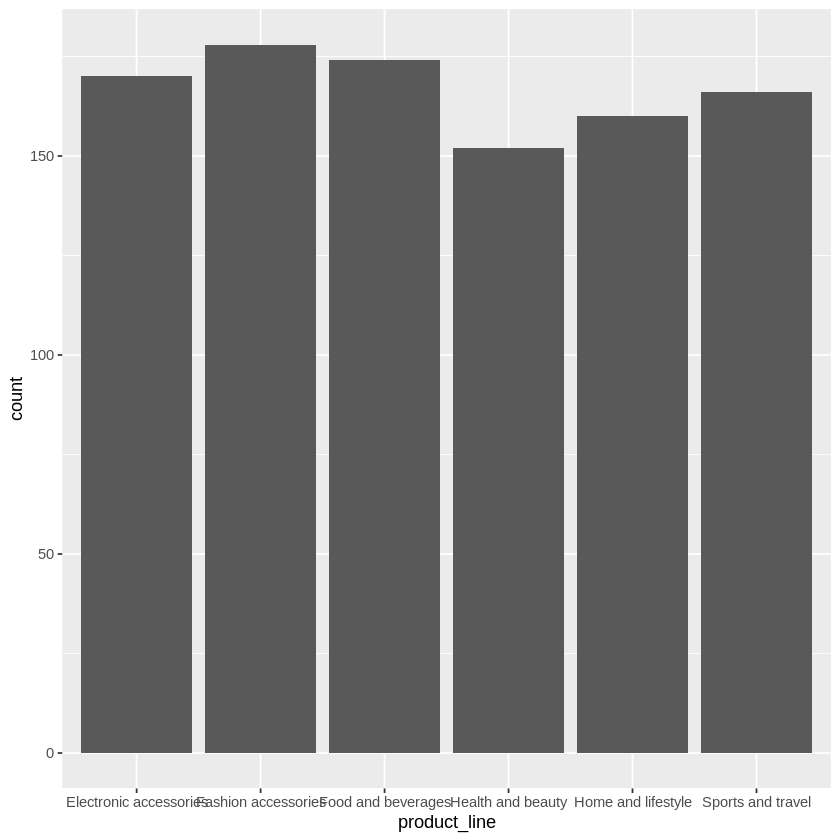

In [134]:
# visual for the product line
p <- ggplot(super_df, aes(x = product_line))
p + geom_bar()

In [135]:
# summary count for product line
table(super_df$product_line)


Electronic accessories    Fashion accessories     Food and beverages 
                   170                    178                    174 
     Health and beauty     Home and lifestyle      Sports and travel 
                   152                    160                    166 

**Observation**: Fashion accessories were bought slightly more than Electronic accessories and food & beverages.

In [136]:
# getting the summray counts of the number of customers from the different branches
table(super_df$branch)


  A   B   C 
340 332 328 

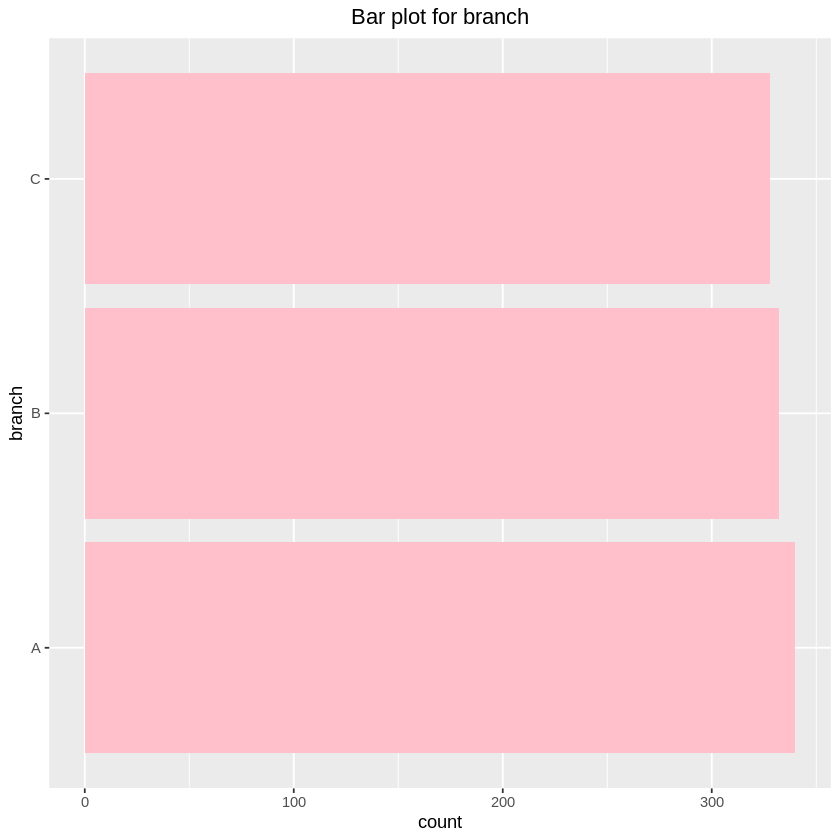

In [137]:
# Bar plot of branch
ggplot(data = super_df, mapping = aes(x = branch)) +
  geom_bar(fill = "pink") + coord_flip() +
  labs(x = "branch") +
  ggtitle("Bar plot for branch") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: There are sightly more customers from branch A than there are from B and C.

In [138]:
# summary counts for the customer type
table(super_df$customer_type)


Member Normal 
   501    499 

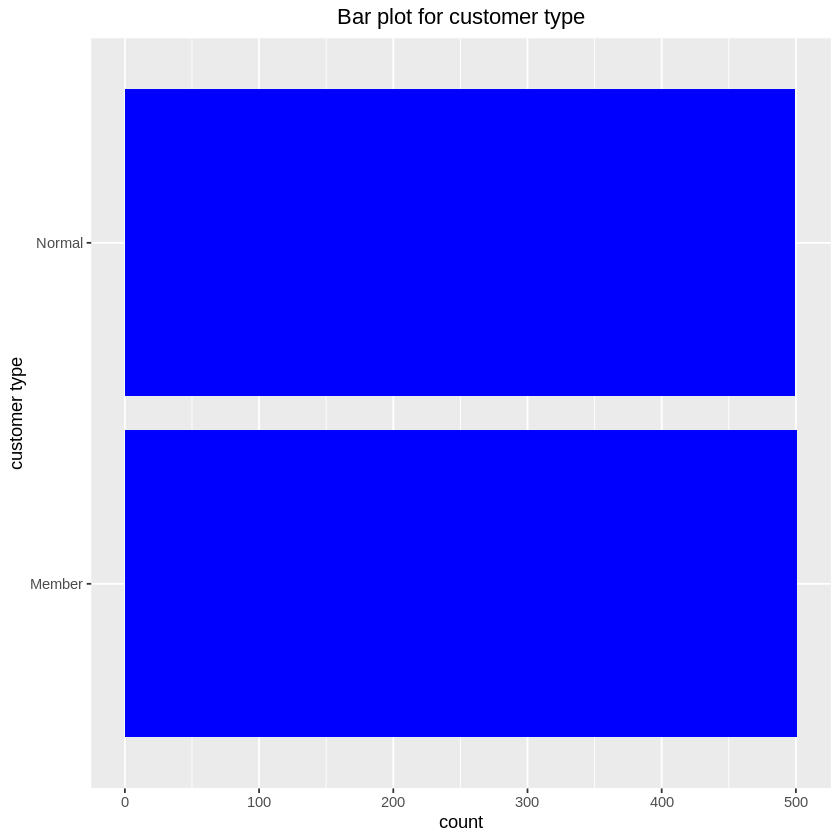

In [139]:
# Bar plot of customer type
ggplot(data = super_df, mapping = aes(x = customer_type)) +
  geom_bar(fill = "blue") + coord_flip() +
  labs(x = "customer type") +
  ggtitle("Bar plot for customer type") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: There are slightly more customers who had membership than those who did not have membership.

In [140]:
# summary counts for gender
table(super_df$gender)


Female   Male 
   501    499 

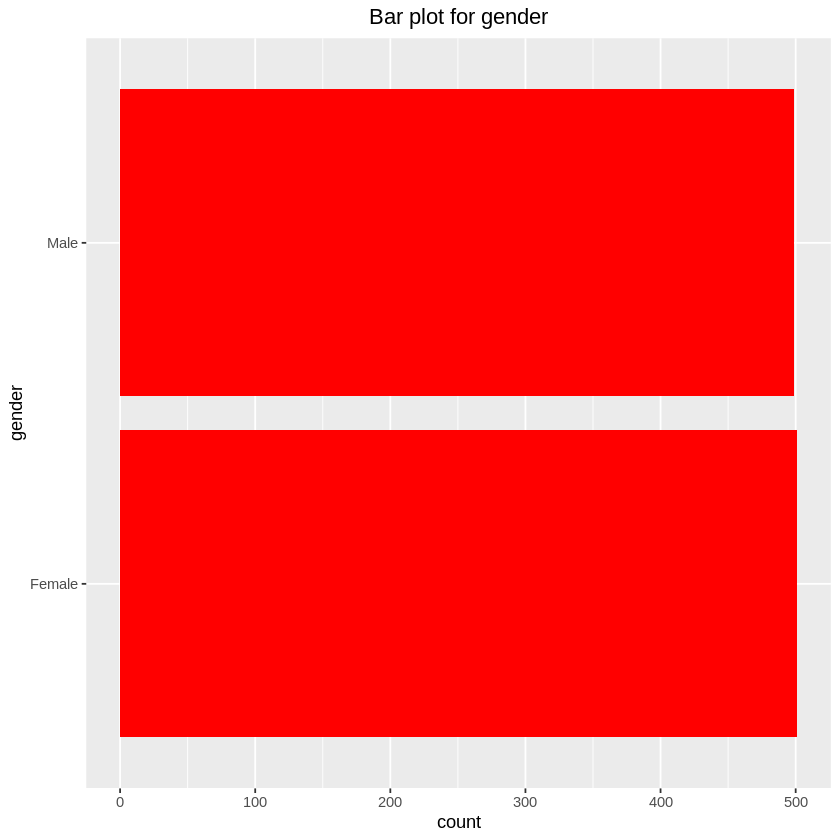

In [141]:
# Bar plot of gender
ggplot(data = super_df, mapping = aes(x = gender)) +
  geom_bar(fill = "red") + coord_flip() +
  labs(x = "gender") +
  ggtitle("Bar plot for gender") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: There are slightly more Female customers than male.

In [142]:
# Dividing the unit price into groups
min(super_df$unit_price); max(super_df$unit_price)
price <- floor(runif(10, min = 10 , max = 100))
price

[1] 10.08

[1] 99.96

[1] 13 27 64 20 71 10 26 83 14 75

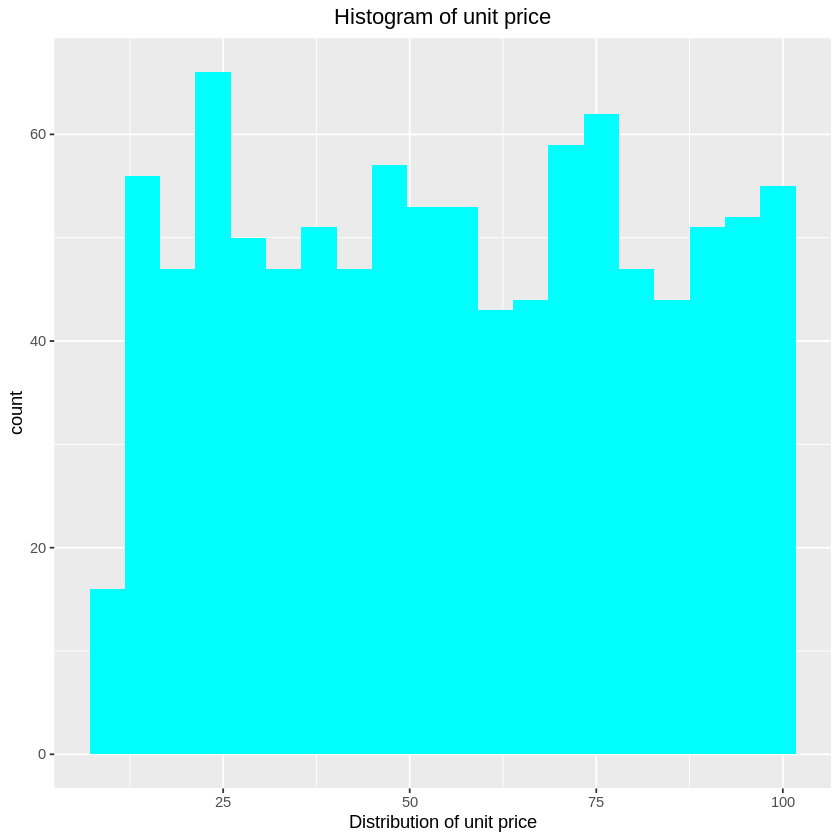

In [143]:
# Histogram of price
ggplot(data = super_df, mapping = aes(x = unit_price)) +
  geom_histogram(bins = 20, fill = "cyan") +
  labs(x = "Distribution of unit price") +
  ggtitle("Histogram of unit price") +
  theme(plot.title = element_text(hjust = 0.5))

In [144]:
# summary count for quantity of product brought
table(super_df$quantity)


  1   2   3   4   5   6   7   8   9  10 
112  91  90 109 102  98 102  85  92 119 

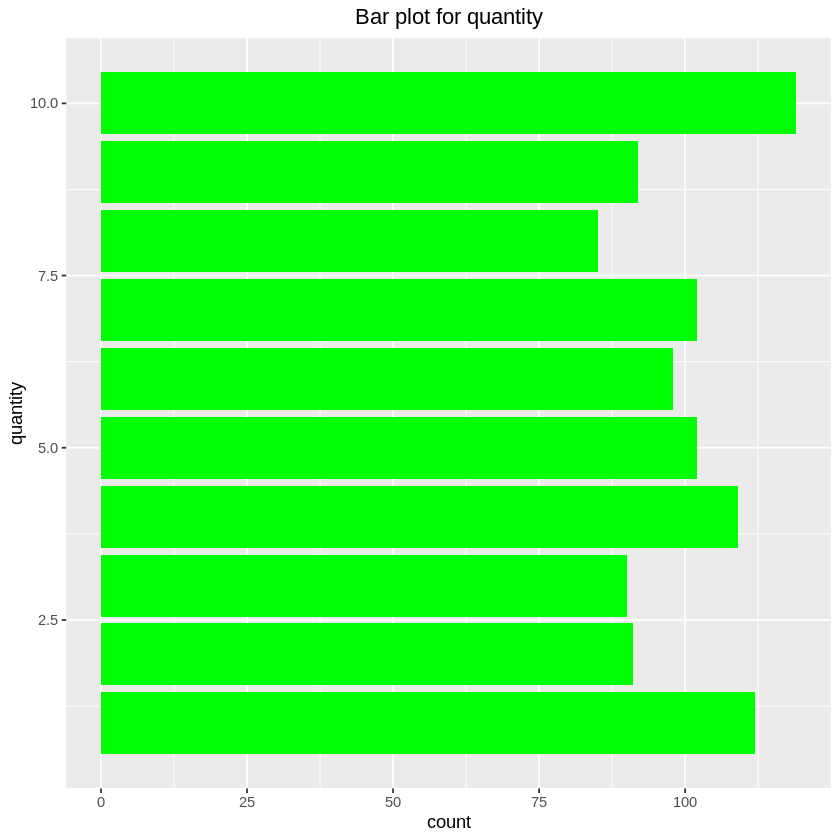

In [145]:
# Bar plot of quantity
ggplot(data = super_df, mapping = aes(x = quantity)) +
  geom_bar(fill = "green") + coord_flip() +
  labs(x = "quantity") +
  ggtitle("Bar plot for quantity") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: Most of the product bought by the customer were acquired in 10 units.

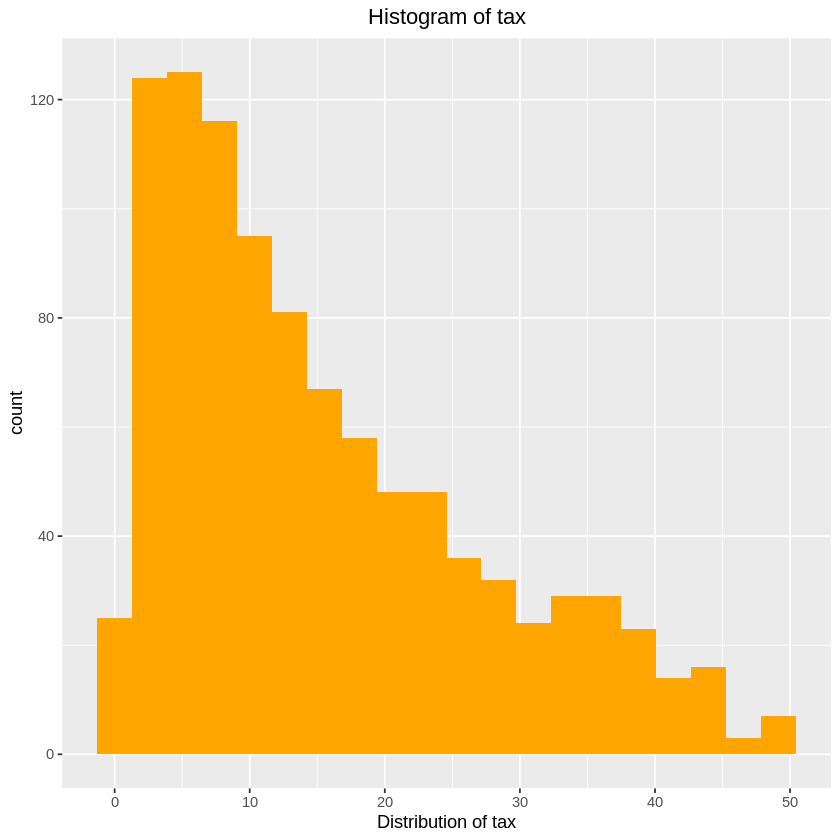

In [146]:
# Histogram of tax
ggplot(data = super_df, mapping = aes(x = tax)) +
  geom_histogram(bins = 20, fill = "orange") +
  labs(x = "Distribution of tax") +
  ggtitle("Histogram of tax") +
  theme(plot.title = element_text(hjust = 0.5))


**Observation**: From the graph it is evident that the tax imposed on the product is skewed to the left

In [147]:
# summary counts of the mode of payment used by the customers
table(super_df$payment)


       Cash Credit card     Ewallet 
        344         311         345 

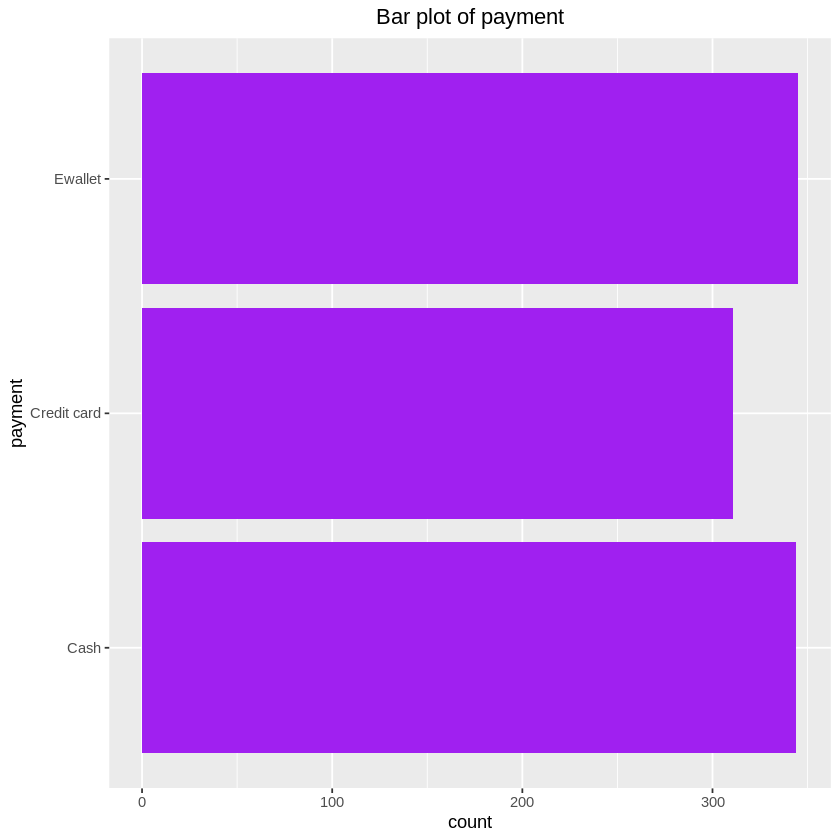

In [148]:
# Bar plot of payment 
ggplot(data = super_df, mapping = aes(x = payment)) +
  geom_bar(fill = "purple") + coord_flip() +
  labs(x = "payment") +
  ggtitle("Bar plot of payment") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: Most of the customers paid for the products using the Ewallet and through cash.

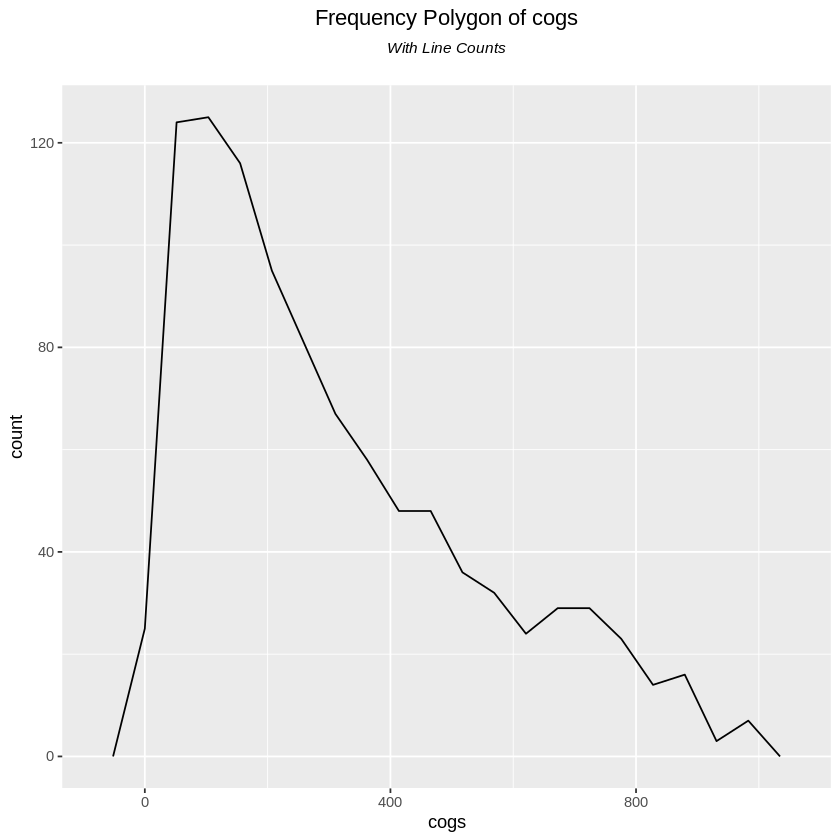

In [149]:
# frequency polygon for cogs displaying count with lines
ggplot(data = super_df, mapping = aes(x = cogs)) +
  geom_freqpoly(bins = 20) +
  labs(x = "cogs") +
  ggtitle(expression(atop("Frequency Polygon of cogs", atop(italic("With Line Counts", ""))))) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(plot.subtitle = element_text(hjust = 0.5))

In [150]:
# Summary of gross margin percentage
table(super_df$gross_margin_percentage)


4.761904762 
       1000 

**Observation**: Gross margin percentage is a constant.

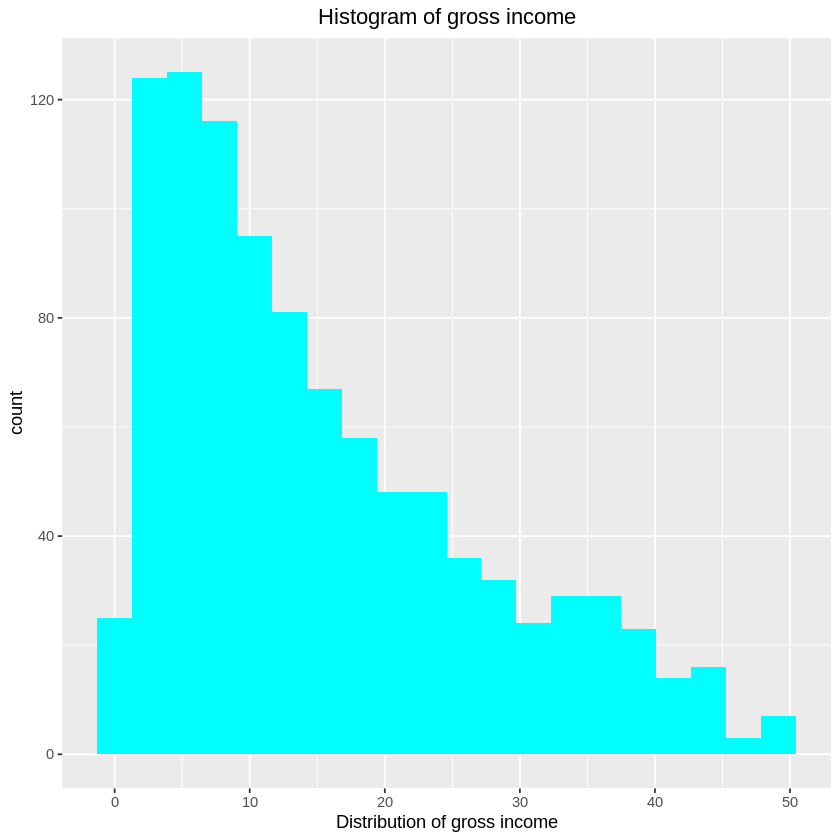

In [151]:
# Histogram of gross income
ggplot(data = super_df, mapping = aes(x = gross_income)) +
  geom_histogram(bins = 20, fill = "cyan") +
  labs(x = "Distribution of gross income") +
  ggtitle("Histogram of gross income") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: Most of the customers were low income earners evident from the skew to the left. However, it worth noting that there are also few who earned a high income.

In [152]:
# summary count for product ratings
table(super_df$rating)


  4 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 
 11  17  22  18  17  17   8  12  13  18  21  21  15  11  14  19  16  14  14  17 
  6 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9   7 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 
 26  14  21  15  16  21  24  19  13  15  20  16  18  18  16  13  20  18  15  18 
  8 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9   9 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9 
 21  13  14  11  18  18  18  20  14  16  15  14  16  16  12  22  17  14  19  16 
 10 
  5 

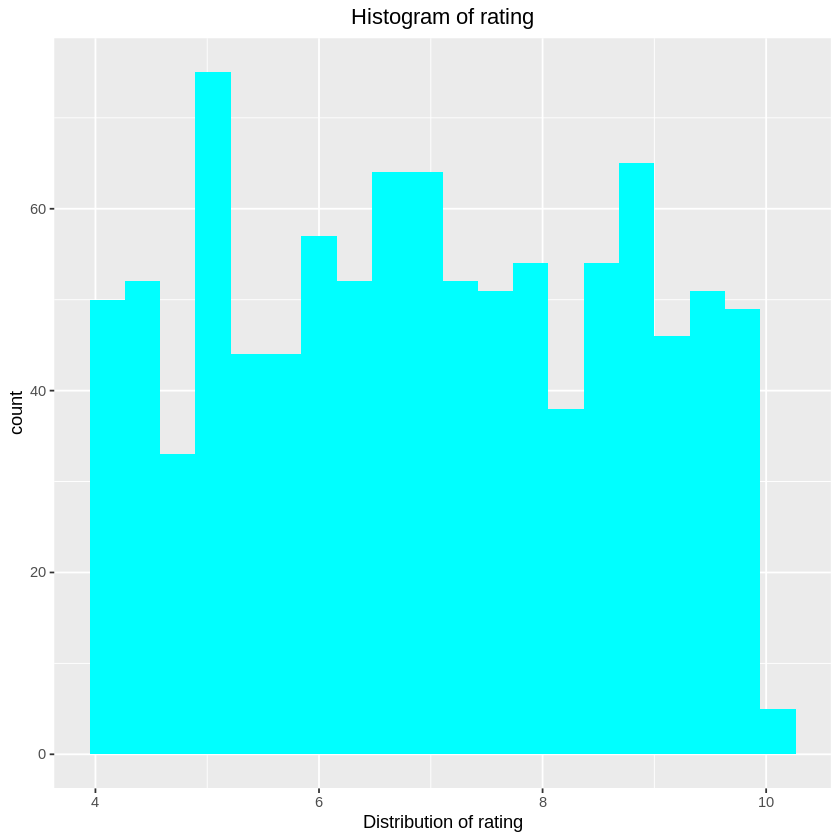

In [153]:
# Histogram of rating
ggplot(data = super_df, mapping = aes(x = rating)) +
  geom_histogram(bins = 20, fill = "cyan") +
  labs(x = "Distribution of rating") +
  ggtitle("Histogram of rating") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: The product that had the highest number of ratings had a rating of 4.2 and 10 had the lowest.

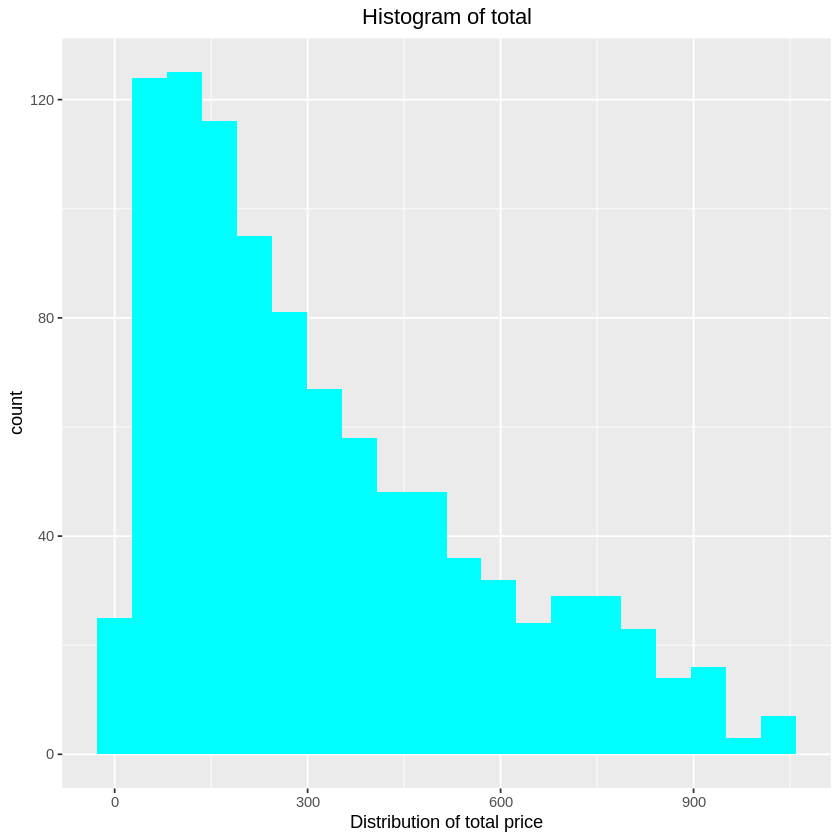

In [154]:
# Histogram of total
ggplot(data = super_df, mapping = aes(x = total)) +
  geom_histogram(bins = 20, fill = "cyan") +
  labs(x = "Distribution of total price") +
  ggtitle("Histogram of total") +
  theme(plot.title = element_text(hjust = 0.5))

In [155]:
names(super_df)

[1] "invoice_id"              "branch"                 
 [3] "customer_type"           "gender"                 
 [5] "product_line"            "unit_price"             
 [7] "quantity"                "tax"                    
 [9] "date"                    "time"                   
[11] "payment"                 "cogs"                   
[13] "gross_margin_percentage" "gross_income"           
[15] "rating"                  "total"

# Bivariate Graphical Exploratory Data Analysis

### Bivariate summaries

In [202]:
names(super_df)

[1] "invoice_id"              "branch"                 
 [3] "customer_type"           "gender"                 
 [5] "product_line"            "unit_price"             
 [7] "quantity"                "tax"                    
 [9] "date"                    "time"                   
[11] "payment"                 "cogs"                   
[13] "gross_margin_percentage" "gross_income"           
[15] "rating"                  "total"                  
[17] "sex"                     "customer_membership"    
[19] "product_type"            "payment_mode"           
[21] "branch_type"

In [203]:
# summary counts for customer types in the branches
table(super_df$branch, super_df$customer_type)

   
    Member Normal
  A    167    173
  B    165    167
  C    169    159

**Observation**: All the branches had a relatively equal number of normal customers as well as customers who had membership.

In [204]:
# number of males and females in the branches
table(super_df$gender,super_df$branch)

        
           A   B   C
  Female 161 162 178
  Male   179 170 150

**Observation**: Branch A and B had slightly more males than females. Branch C had more females than males

In [205]:
# customer types and the product lines they bought
table(super_df$customer_type,super_df$product_line)

        
         Electronic accessories Fashion accessories Food and beverages
  Member                     78                  86                 94
  Normal                     92                  92                 80
        
         Health and beauty Home and lifestyle Sports and travel
  Member                73                 83                87
  Normal                79                 77                79

**Observation**: More normal customers bought electronic accessories,fashion accessories and Health and beauty. While more member customers bought Home and life style, Sports and Travel and food & beverages.

In [206]:
# gender against the product lines
table(super_df$gender,super_df$product_line)

        
         Electronic accessories Fashion accessories Food and beverages
  Female                     84                  96                 90
  Male                       86                  82                 84
        
         Health and beauty Home and lifestyle Sports and travel
  Female                64                 79                88
  Male                  88                 81                78

**Observation**: More females were interested in Fashion accesories, Food & Beverages and Sports & Travel. While the males were more interested in Electronic accesories, Health & Beauty and Home & Lifestyle.

In [207]:
# payment mode against the customer type
table(super_df$customer_type, super_df$payment)

        
         Cash Credit card Ewallet
  Member  168         172     161
  Normal  176         139     184

**Observation**: More customers who had membership prefered to pay through Credit Card. More Customers who had no membership preferred payment through cash and Ewallet.

### Covariance and Correlation

In [157]:
# loading the package for covariance and correlation
install.packages("Hmisc")
install.packages("survival")
install.packages("lattice")
library(Hmisc)
library(survival)
library(lattice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [164]:
# creating a new column named sex and changing the gender column to numeric
super_df$sex <- as.numeric(as.factor(super_df$gender))

In [167]:
# creating a new column named customer membership from customer type
super_df$customer_membership <- as.numeric(as.factor(super_df$customer_type))

In [168]:
# creating a new column named product type from product line
super_df$product_type <- as.numeric(as.factor(super_df$product_line))

In [170]:
# creating a new column named payment mode from payment
super_df$payment_mode <- as.numeric(as.factor(super_df$payment))

In [166]:
# checking the unique values in the column sex
unique(super_df$sex)

[1] 1 2

In [172]:
# checking the unique values in the customer membership
unique(super_df$customer_membership)

[1] 1 2

In [173]:
# checking the unique values in the column sex
unique(super_df$product_type)

[1] 4 1 5 6 3 2

In [174]:
# creating a new column named branch type from branch
super_df$branch_type <- as.numeric(as.factor(super_df$branch))

In [176]:
# creating a data frae with numeric values containing the categorical ones
 <- super_df[,c(6:8,12,14:21)]

In [177]:
# checking the columns names
names(numeric_df)

[1] "unit_price"          "quantity"            "tax"                
 [4] "cogs"                "gross_income"        "rating"             
 [7] "total"               "sex"                 "customer_membership"
[10] "product_type"        "payment_mode"        "branch_type"

In [178]:
# getting the covariance matrix
res1 <- cov(as.matrix(numeric_df))
res1

unit_price   quantity     tax          cogs        
unit_price           701.9653313   0.83477848  196.6683401  3933.366802
quantity               0.8347785   8.54644645   24.1495704   482.991408
tax                  196.6683401  24.14957038  137.0965941  2741.931883
cogs                3933.3668019 482.99140761 2741.9318829 54838.637658
gross_income         196.6683401  24.14957038  137.0965941  2741.931883
rating                -0.3996675  -0.07945646   -0.7333003   -14.666006
total               4130.0351420 507.14097799 2879.0284770 57580.569541
sex                    0.2047018  -0.10859860   -0.2896508    -5.793016
customer_membership   -0.2682311  -0.02451451   -0.1152153    -2.304307
product_type           0.8781254   0.10158158    0.6351168    12.702337
payment_mode          -0.3507529  -0.00951952   -0.1209033    -2.418065
branch_type            0.6109465   0.03815816    0.3929614     7.859228
                    gross_income rating        total        sex         
unit_price           196.6683401  -0.399667519  4130.035142  0.204701832
quantity              24.1495704  -0.079456456   507.140978 -0.108598599
tax                  137.0965941  -0.733300277  2879.028477 -0.289650782
cogs                2741.9318829 -14.666005532 57580.569541 -5.793015636
gross_income         137.0965941  -0.733300277  2879.028477 -0.289650782
rating                -0.7333003   2.953518228   -15.399306  0.004126827
total               2879.0284770 -15.399305808 60459.598018 -6.082666417
sex                   -0.2896508   0.004126827    -6.082666  0.250249249
customer_membership   -0.1152153   0.016238939    -2.419522  0.010009009
product_type           0.6351168  -0.060520921    13.337453  0.004456456
payment_mode          -0.1209033  -0.007680380    -2.538969  0.018519520
branch_type            0.3929614   0.014386787     8.252189 -0.023035035
                    customer_membership product_type payment_mode branch_type
unit_price          -0.268231101         0.878125365 -0.350752883  0.61094651
quantity            -0.024514515         0.101581582 -0.009519520  0.03815816
tax                 -0.115215346         0.635116829 -0.120903272  0.39296139
cogs                -2.304306927        12.702336577 -2.418065445  7.85922779
gross_income        -0.115215346         0.635116829 -0.120903272  0.39296139
rating               0.016238939        -0.060520921 -0.007680380  0.01438679
total               -2.419522273        13.337453405 -2.538968718  8.25218918
sex                  0.010009009         0.004456456  0.018519520 -0.02303504
customer_membership  0.250249249        -0.031579580  0.007508509 -0.00802002
product_type        -0.031579580         2.942638639  0.042590591 -0.07565165
payment_mode         0.007508509         0.042590591  0.689688689 -0.03402202
branch_type         -0.008020020        -0.075651652 -0.034022022  0.66852452

**Observation**: The negative values signify a negative relationship between two variables. Positive values signify a positive relatioship.

In [179]:
# getting the pearson correlation
res2 <- cor(as.matrix(numeric_df))
res2

unit_price   quantity    tax         cogs       
unit_price           1.000000000  0.01077756  0.63396209  0.63396209
quantity             0.010777564  1.00000000  0.70551019  0.70551019
tax                  0.633962089  0.70551019  1.00000000  1.00000000
cogs                 0.633962089  0.70551019  1.00000000  1.00000000
gross_income         0.633962089  0.70551019  1.00000000  1.00000000
rating              -0.008777507 -0.01581490 -0.03644170 -0.03644170
total                0.633962089  0.70551019  1.00000000  1.00000000
sex                  0.015444630 -0.07425831 -0.04945099 -0.04945099
customer_membership -0.020237875 -0.01676271 -0.01967028 -0.01967028
product_type         0.019321028  0.02025600  0.03162072  0.03162072
payment_mode        -0.015941048 -0.00392099 -0.01243364 -0.01243364
branch_type          0.028202440  0.01596379  0.04104666  0.04104666
                    gross_income rating       total       sex         
unit_price           0.63396209  -0.008777507  0.63396209  0.015444630
quantity             0.70551019  -0.015814905  0.70551019 -0.074258307
tax                  1.00000000  -0.036441705  1.00000000 -0.049450989
cogs                 1.00000000  -0.036441705  1.00000000 -0.049450989
gross_income         1.00000000  -0.036441705  1.00000000 -0.049450989
rating              -0.03644170   1.000000000 -0.03644170  0.004800208
total                1.00000000  -0.036441705  1.00000000 -0.049450989
sex                 -0.04945099   0.004800208 -0.04945099  1.000000000
customer_membership -0.01967028   0.018888672 -0.01967028  0.039996160
product_type         0.03162072  -0.020528973  0.03162072  0.005193197
payment_mode        -0.01243364  -0.005381289 -0.01243364  0.044577609
branch_type          0.04104666   0.010238476  0.04104666 -0.056317558
                    customer_membership product_type payment_mode branch_type
unit_price          -0.02023787          0.019321028 -0.015941048  0.02820244
quantity            -0.01676271          0.020256001 -0.003920990  0.01596379
tax                 -0.01967028          0.031620725 -0.012433637  0.04104666
cogs                -0.01967028          0.031620725 -0.012433637  0.04104666
gross_income        -0.01967028          0.031620725 -0.012433637  0.04104666
rating               0.01888867         -0.020528973 -0.005381289  0.01023848
total               -0.01967028          0.031620725 -0.012433637  0.04104666
sex                  0.03999616          0.005193197  0.044577609 -0.05631756
customer_membership  1.00000000         -0.036800311  0.018073436 -0.01960787
product_type        -0.03680031          1.000000000  0.029896383 -0.05393756
payment_mode         0.01807344          0.029896383  1.000000000 -0.05010429
branch_type         -0.01960787         -0.053937557 -0.050104288  1.00000000

In [180]:
# packages for the correlation plot
install.packages("dplyr")
install.packages("ggcorrplot")
library(dplyr) # loading the package to use select if 
library(ggcorrplot) # loading the visual plot for correlation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




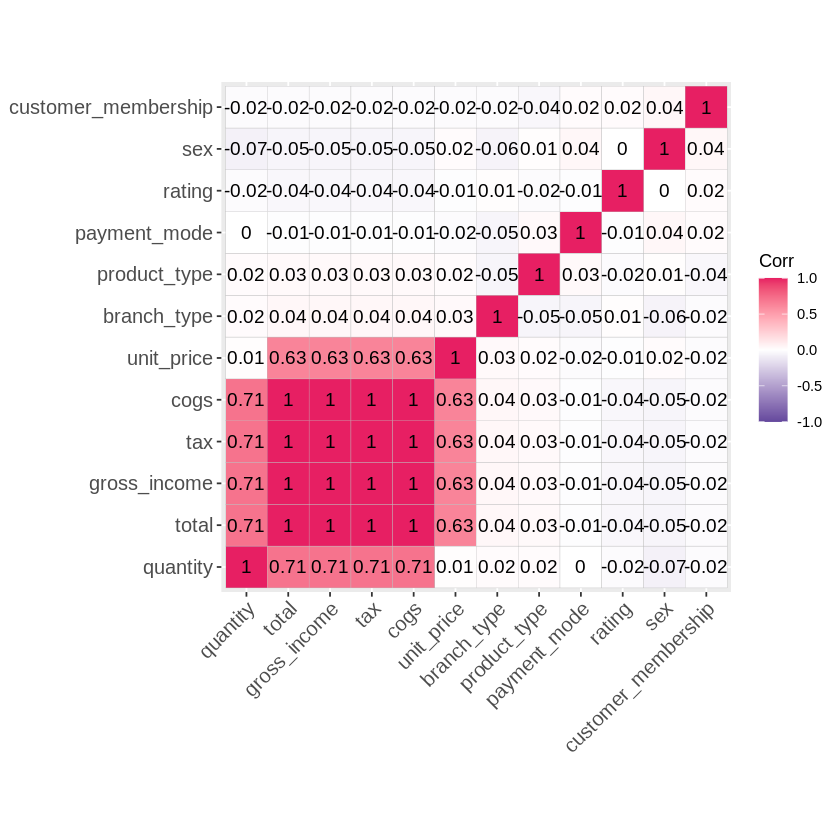

In [181]:
# obtaining correlation coefficients for numeric variables
corr = round(cor(select_if(numeric_df, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#65499D", "white", "#E71F63"), lab = T)

From the plot above, there is a positive correlation between:

  * tax and the unit price.
  * unit price and cost of goods(cogs).
  * gross income and unit price
  * total and unit price.
  * tax and quantity
  * cogs and quantity
  * gross income and quantity

### Graphical Techniques

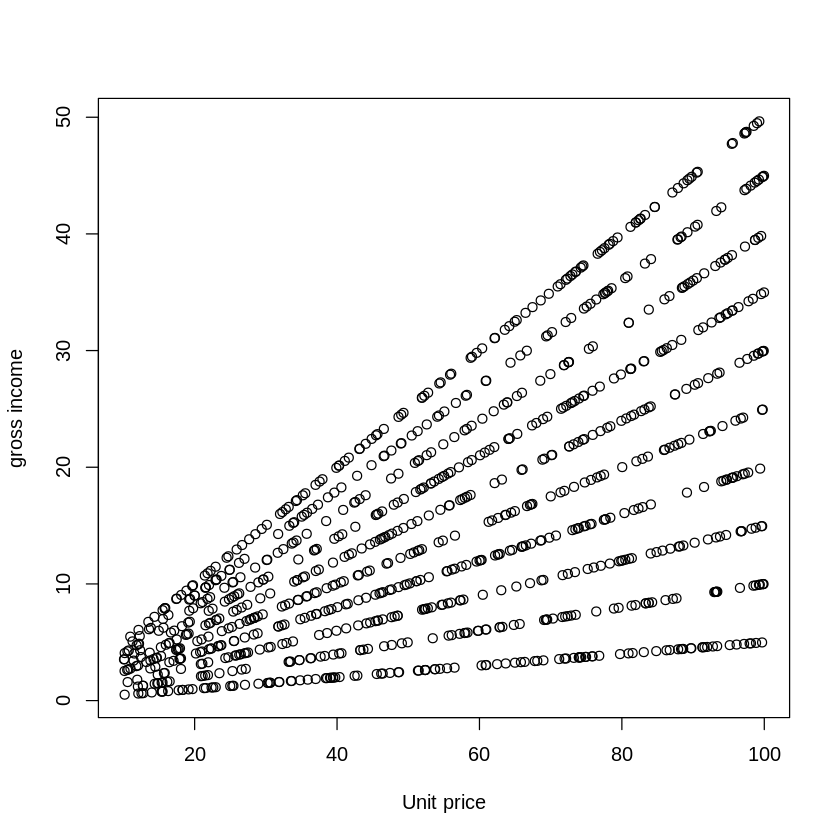

In [183]:
# plotting a  simple scatter plot to illustrate the relationship between the age and area income
plot(numeric_df$unit_price,numeric_df$gross_income, xlab="Unit price", ylab="gross income")

**Observation**: There is a positive relationship between gross income and the unit price of the product. It is important to not that the pattern of the data points show some  element of heteskedasticity.

In [184]:
# creating a linear model from the two attributes
lmMod <- lm(gross_income ~ unit_price, data=numeric_df) # initial model

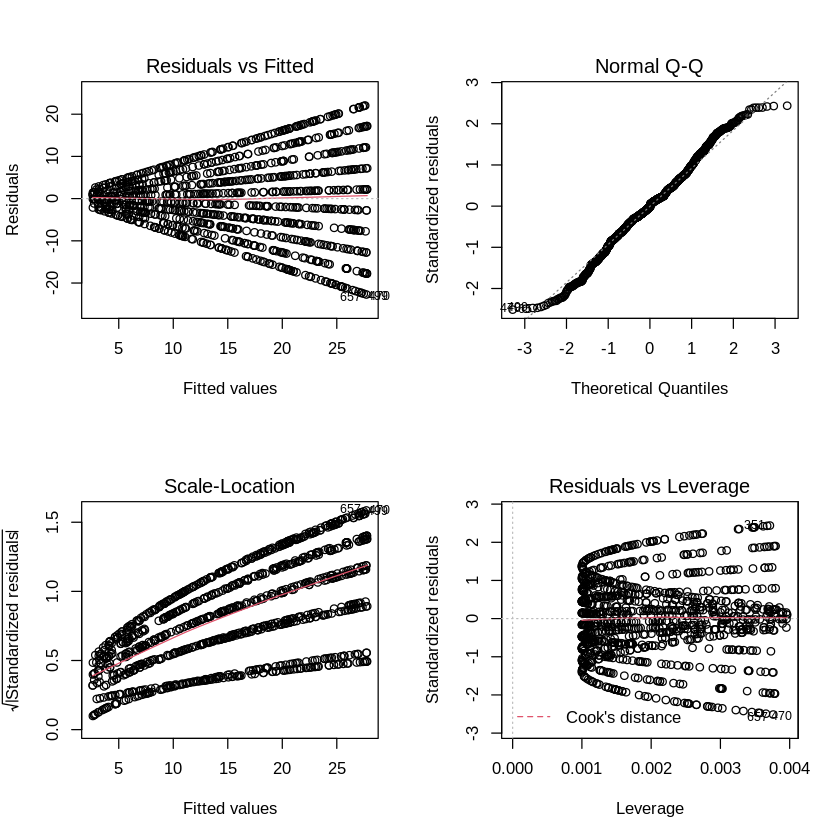

In [185]:
# confirming that there is heteroskedasticity
par(mfrow=c(2,2)) # init 4 charts in 1 panel
plot(lmMod)

In [188]:
# installing the package necesary for confirmatory test for heteroskedasticity
install.packages("zoo")
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [189]:
lmtest::bptest(lmMod)  # Breusch-Pagan test for heteroskedasticity


	studentized Breusch-Pagan test

data:  lmMod
BP = 331.89, df = 1, p-value < 2.2e-16


**Observation**: The test gives a p-value less that of significance level of 0.05, therefore we can reject the null hypothesis that the variance of the residuals is constant and infer that heteroscedasticity is indeed present, thereby confirming our graphical inference

In [192]:
# installing package necessary for tests to rectify heteroskedasticity
install.packages("caret")
install.packages("e1071")
library(e1071)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute


The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness




In [193]:
# using Box-cox transformation  on the  variable to make it approximate to a normal distribution
incomeBCMod <- caret::BoxCoxTrans(numeric_df$gross_income)
print(incomeBCMod)

Box-Cox Transformation

1000 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5085  5.9249 12.0880 15.3794 22.4453 49.6500 

Largest/Smallest: 97.6 
Sample Skewness: 0.89 

Estimated Lambda: 0.3 



**Observation**:The model for creating the box-cox transformed variable is ready. Applying it on numeric_df$gross_income and appending it to a new dataframe.

**Observation**:The transformed data for our new regression model is ready for modelling  and checking for heteroscedasticity.

In [196]:
lmMod_bc <- lm(income_new ~ unit_price, data=numeric_df)
bptest(lmMod_bc)


	studentized Breusch-Pagan test

data:  lmMod_bc
BP = 62.469, df = 1, p-value = 2.707e-15


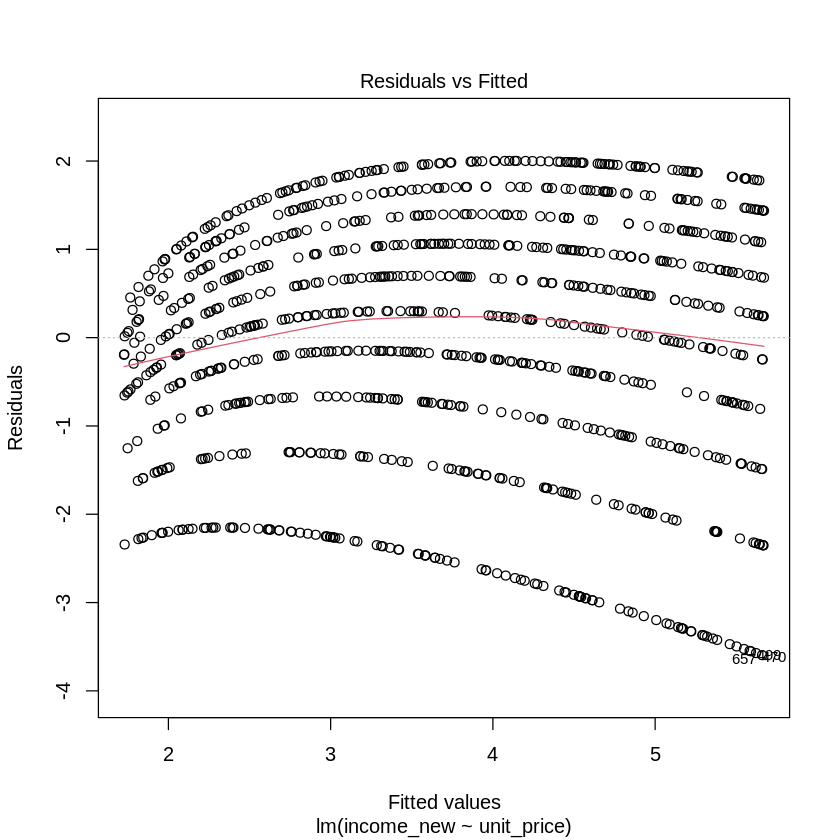

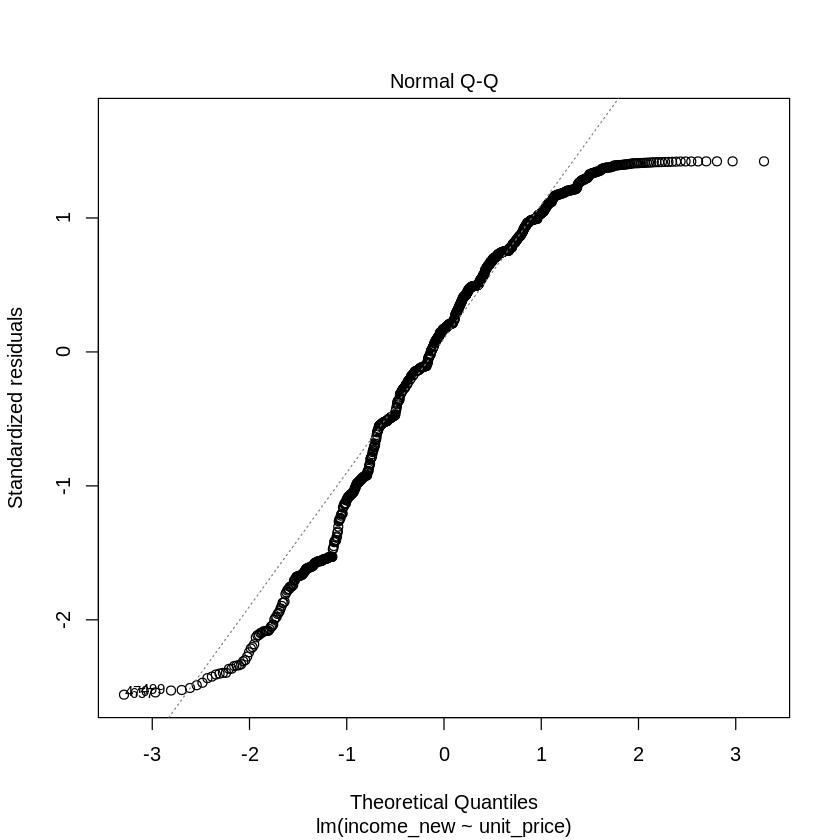

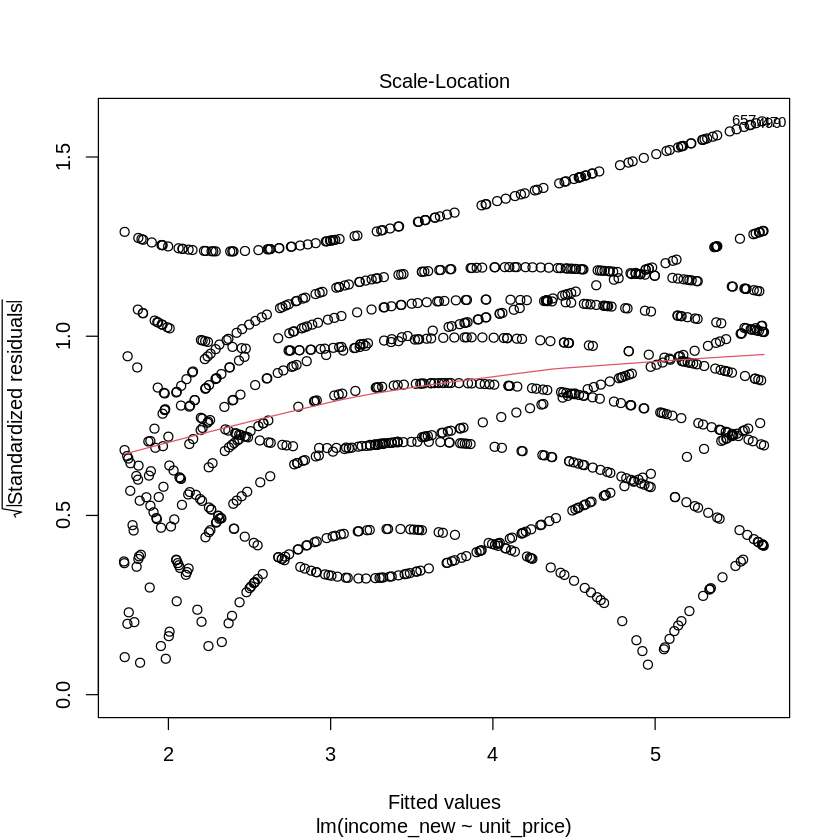

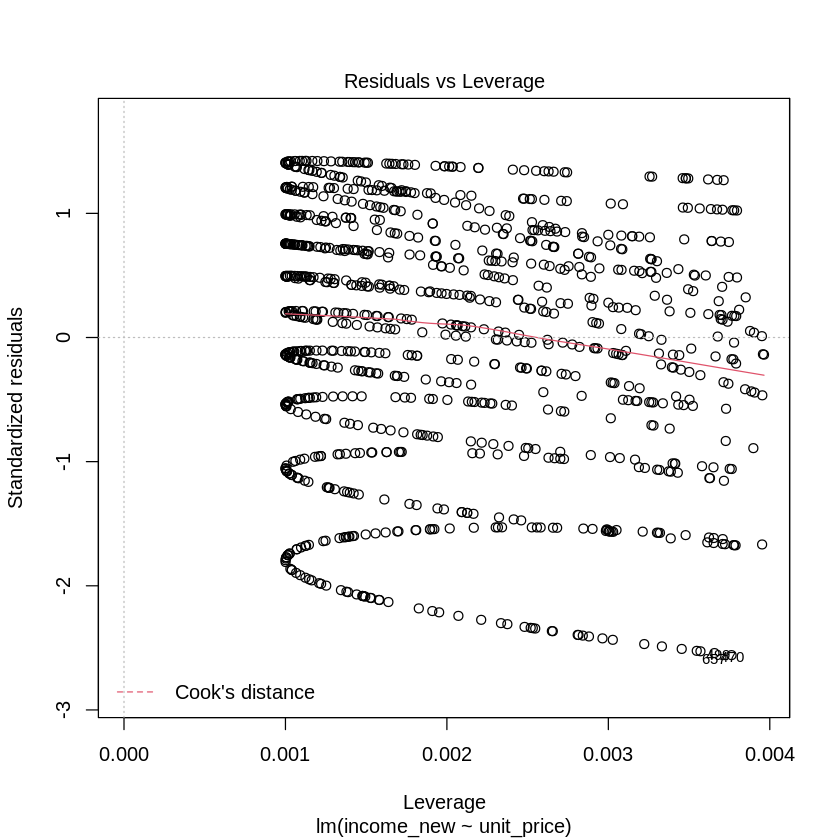

In [197]:
plot(lmMod_bc)

**Observation**: The residuals are evenly distributed residuals in the plot after the transformation. So the problem of heteroscedsticity is solved.

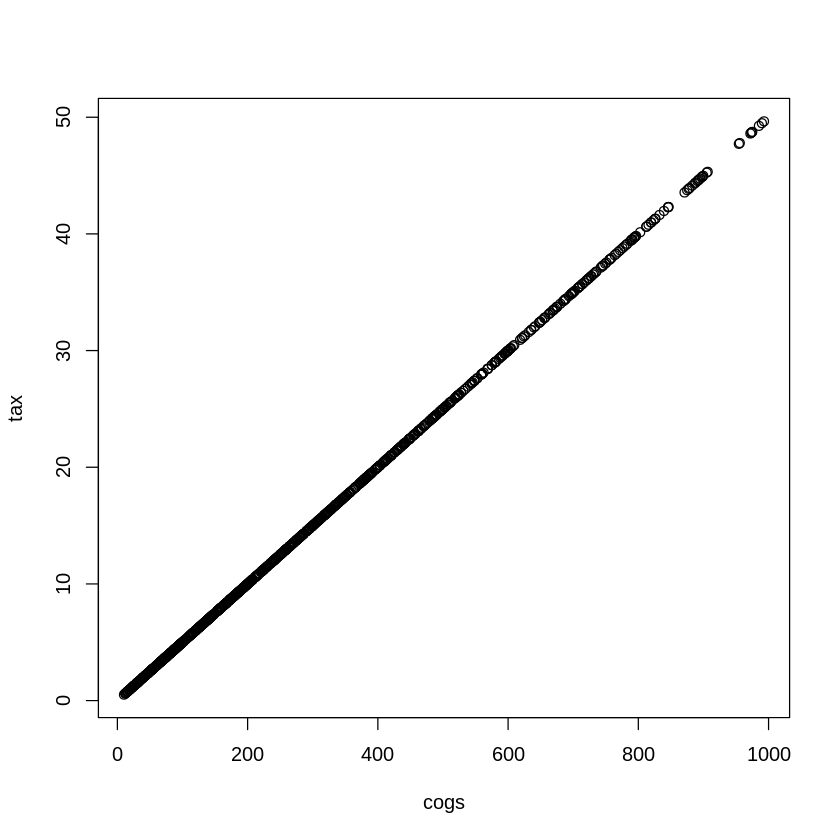

In [199]:
# plotting a  simple scatter plot to illustrate the relationship between cogs and tax
plot(numeric_df$cogs,numeric_df$tax, xlab="cogs", ylab="tax")

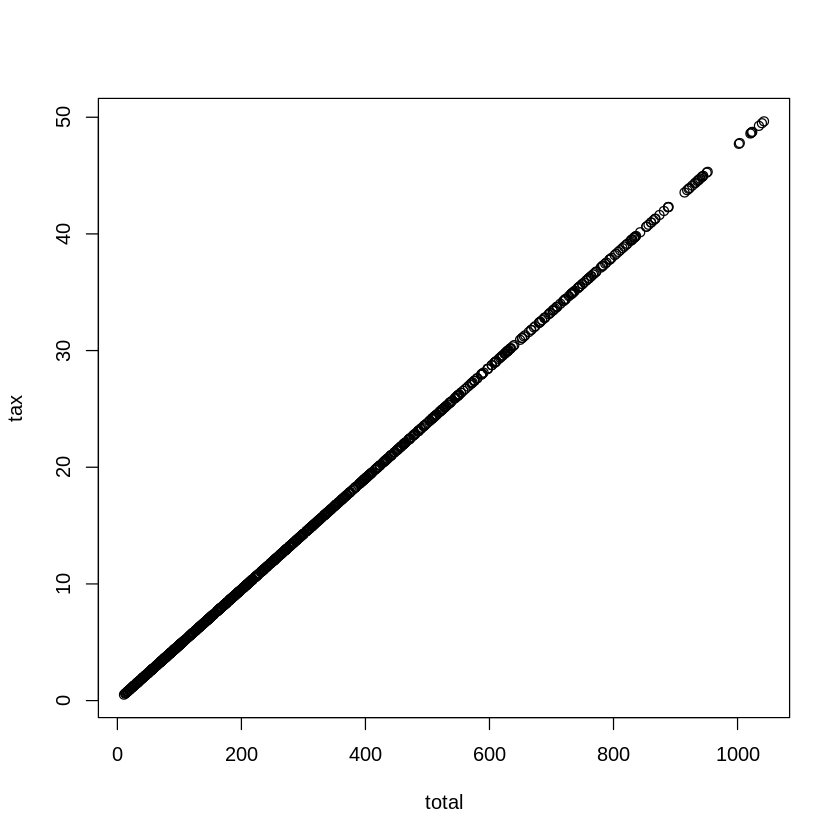

In [200]:
# plotting a  simple scatter plot to illustrate the relationship between total and tax
plot(numeric_df$total,numeric_df$tax, xlab="total", ylab="tax")


## Impementing the Solution

#### Dimensionality Reduction

#### PCA

In [212]:
# numerical data excluding the categorical
head(numeric_df)
str(numeric_df)

unit_price quantity tax     cogs   gross_income rating total    sex
1 74.69      7        26.1415 522.83 26.1415      9.1    548.9715 1  
2 15.28      5         3.8200  76.40  3.8200      9.6     80.2200 1  
3 46.33      7        16.2155 324.31 16.2155      7.4    340.5255 2  
4 58.22      8        23.2880 465.76 23.2880      8.4    489.0480 2  
5 86.31      7        30.2085 604.17 30.2085      5.3    634.3785 2  
6 85.39      7        29.8865 597.73 29.8865      4.1    627.6165 2  
  customer_membership product_type payment_mode branch_type income_new
1 1                   4            3            1           5.539818  
2 2                   1            1            3           1.649745  
3 2                   5            2            1           4.355454  
4 1                   4            3            1           5.237408  
5 2                   6            3            1           5.933204  
6 2                   1            3            3           5.903461

'data.frame':	1000 obs. of  13 variables:
 $ unit_price         : num  74.7 15.3 46.3 58.2 86.3 ...
 $ quantity           : num  7 5 7 8 7 7 6 10 2 3 ...
 $ tax                : num  26.14 3.82 16.22 23.29 30.21 ...
 $ cogs               : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross_income       : num  26.14 3.82 16.22 23.29 30.21 ...
 $ rating             : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ total              : num  549 80.2 340.5 489 634.4 ...
 $ sex                : num  1 1 2 2 2 2 1 1 1 1 ...
 $ customer_membership: num  1 2 2 1 2 2 1 2 1 1 ...
 $ product_type       : num  4 1 5 4 6 1 1 5 4 3 ...
 $ payment_mode       : num  3 1 2 3 3 3 3 3 2 2 ...
 $ branch_type        : num  1 3 1 1 1 3 1 3 1 2 ...
 $ income_new         : num  5.54 1.65 4.36 5.24 5.93 ...


In [213]:
# passing dataframe to the prcomp()
# setting two arguments, center and scale to be TRUE 
# removing the gross income column that had heteroskedasticity
numeric_df.pca <- prcomp(numeric_df[,-c(5)], center = TRUE, scale. = TRUE)

In [214]:
# previewing the object with summary
summary(numeric_df.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2106 1.06334 1.03165 1.01027 0.99300 0.97718 0.96288
Proportion of Variance 0.4072 0.09422 0.08869 0.08505 0.08217 0.07957 0.07726
Cumulative Proportion  0.4072 0.50144 0.59014 0.67519 0.75736 0.83694 0.91420
                           PC8     PC9    PC10      PC11      PC12
Standard deviation     0.94823 0.32227 0.16322 1.722e-16 4.248e-17
Proportion of Variance 0.07493 0.00865 0.00222 0.000e+00 0.000e+00
Cumulative Proportion  0.98913 0.99778 1.00000 1.000e+00 1.000e+00

*  As a result we obtain 12 principal components, 
each which explain a percentate of the total variation of the dataset.
*  PC1 explains 40% of the total variance, which means that nearly two-fifths
*  of the information in the dataset (12 variables) can be encapsulated by just that one Principal Component. PC2 explains 9% of the variance. PC3 8% etc

In [215]:
# Calling str() to have a look at the PCA object
str(numeric_df.pca)

List of 5
 $ sdev    : num [1:12] 2.211 1.063 1.032 1.01 0.993 ...
 $ rotation: num [1:12, 1:12] -0.294 -0.331 -0.449 -0.449 0.017 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12] "unit_price" "quantity" "tax" "cogs" ...
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:12] 55.67 5.51 15.38 307.59 6.97 ...
  ..- attr(*, "names")= chr [1:12] "unit_price" "quantity" "tax" "cogs" ...
 $ scale   : Named num [1:12] 26.49 2.92 11.71 234.18 1.72 ...
  ..- attr(*, "names")= chr [1:12] "unit_price" "quantity" "tax" "cogs" ...
 $ x       : num [1:1000, 1:12] -2.051 2.343 -0.261 -1.53 -2.721 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


**Observation**: From the pca object-
*  The center point ($center), scaling ($scale), standard deviation(sdev) of each principal component. 
*  The relationship (correlation or anticorrelation, etc) 
between the initial variables and the principal components ($rotation).

* The values of each sample in terms of the principal components ($x)

In [217]:
# installing the relevant libraries to visualize the pca object
install.packages("openxlsx")
install.packages("reshape2")
install.packages("plyr")
install.packages("scales")
install.packages("ggplot2")
install.packages("devtools")
#install.packages("grid")
#install_github("vqv/ggbiplot")
library(openxlsx)
library(reshape2)
library(plyr)
library(scales)
library(ggplot2)
library(devtools)
#library(grid)
#library(ggbiplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


The following object is masked from ‘package:tidyr’:

    smiths


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

-----------------------------------------------------------

In [224]:
# instaling the ggbiplot using devtools
library(devtools); install_github("vqv/ggbiplot", force = TRUE)


✔  checking for file ‘/tmp/Rtmpzmessf/remotes8e0312219f8/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [226]:
# loading the library
library("ggbiplot")
library("grid")

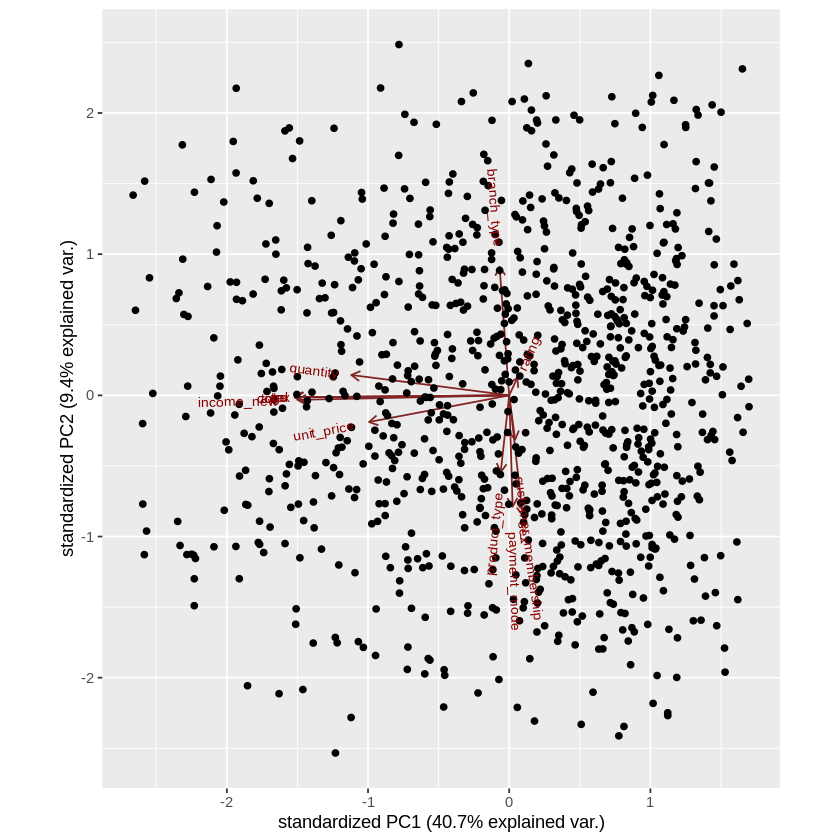

In [227]:
# plotting the pca object
ggbiplot(numeric_df.pca)

**Observation**: From the graph we will see that the variables payment, customer membership and rating contribute to PC1, with higher values in those variables moving the samples to the right on the plot. 

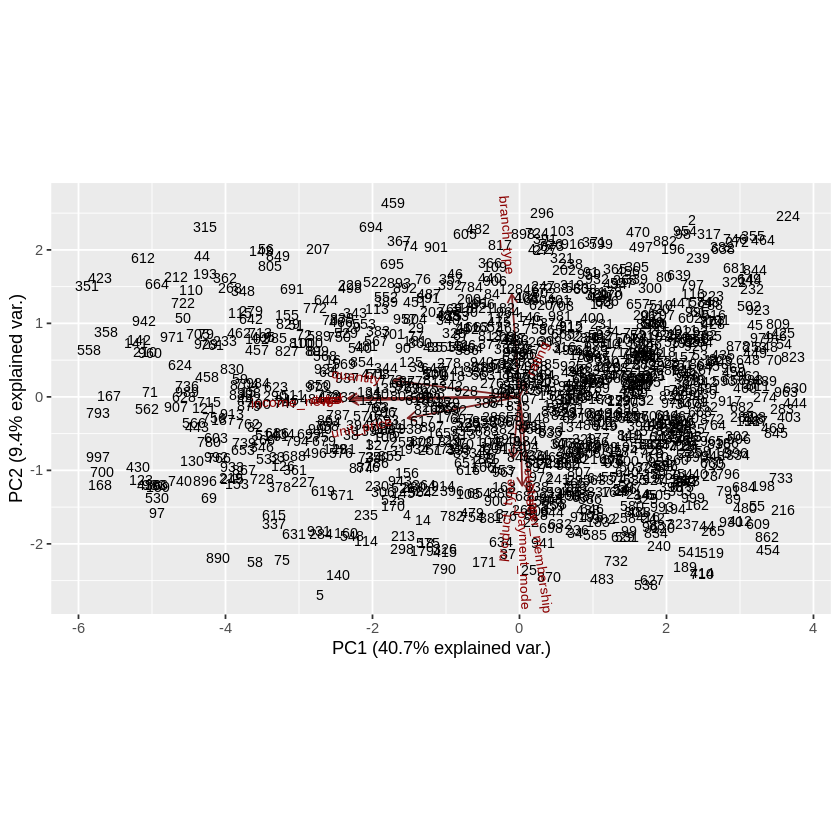

In [230]:
# Adding more detail to the plot, we provide arguments rownames as labels
ggbiplot(numeric_df.pca, labels=rownames(numeric_df), obs.scale = 1, var.scale = 1)

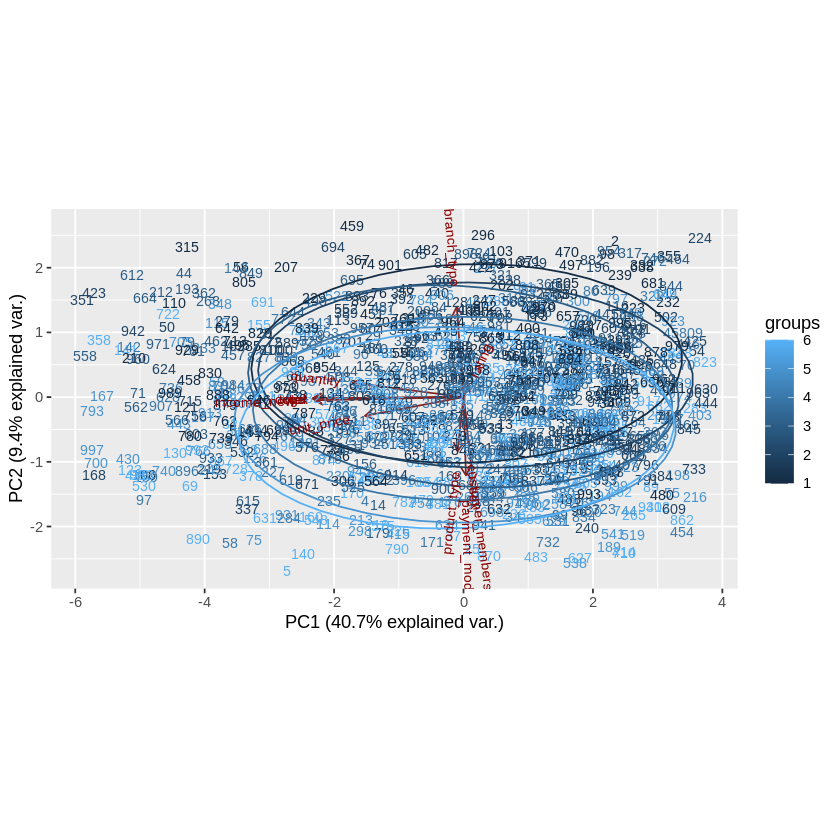

In [232]:
# looking at the customer behaviours through the product type
ggbiplot(numeric_df.pca,ellipse=TRUE,  labels=rownames(numeric_df), groups=numeric_df$product_type, obs.scale = 1, var.scale = 1)

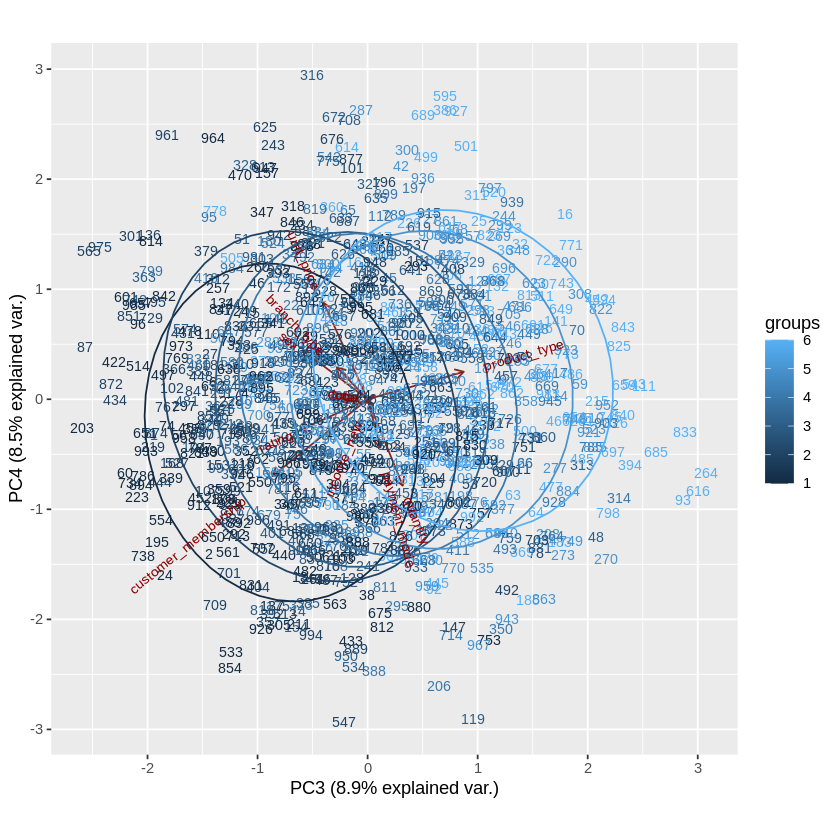

In [233]:
# plotting the plot using the thrid and the fourth principal component
ggbiplot(numeric_df.pca,ellipse=TRUE, choices=c(3,4),  labels=rownames(numeric_df), groups=numeric_df$product_type, obs.scale = 1, var.scale = 1)

**Observation**: It is difficult to derive insights from the given plot mainly because PC3 and PC4 explain very small percentages of the total variation, thus it would be surprising if they were very informative and separated the groups or revealed apparent patterns.

Having performed PCA using this dataset, if we were to build a classification model 
*  to identify the features in a customer that can be transformed to realise maximum sales.
* the variables payment, customer membership and rating would be significant variables as seen in our PCA analysis.

#### Feature Selection

##### Filter Method

In [234]:
# installing the caret package
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [235]:
# Installing and loading the corrplot package for plotting
suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

corrplot 0.84 loaded



In [240]:
# calculating correlation matrix
correlationMatrix <- cor(numeric_df[,-c(5)])

In [241]:
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

In [242]:
# Highly correlated attributes
highlyCorrelated;names(numeric_df[,highlyCorrelated])

[1] 3 4 6

[1] "tax"    "cogs"   "rating"

The variables with a higher correlation can be removed and compare the results graphically.

In [243]:
# removing redudant features
Data2<-numeric_df[,-c(5)][-highlyCorrelated]

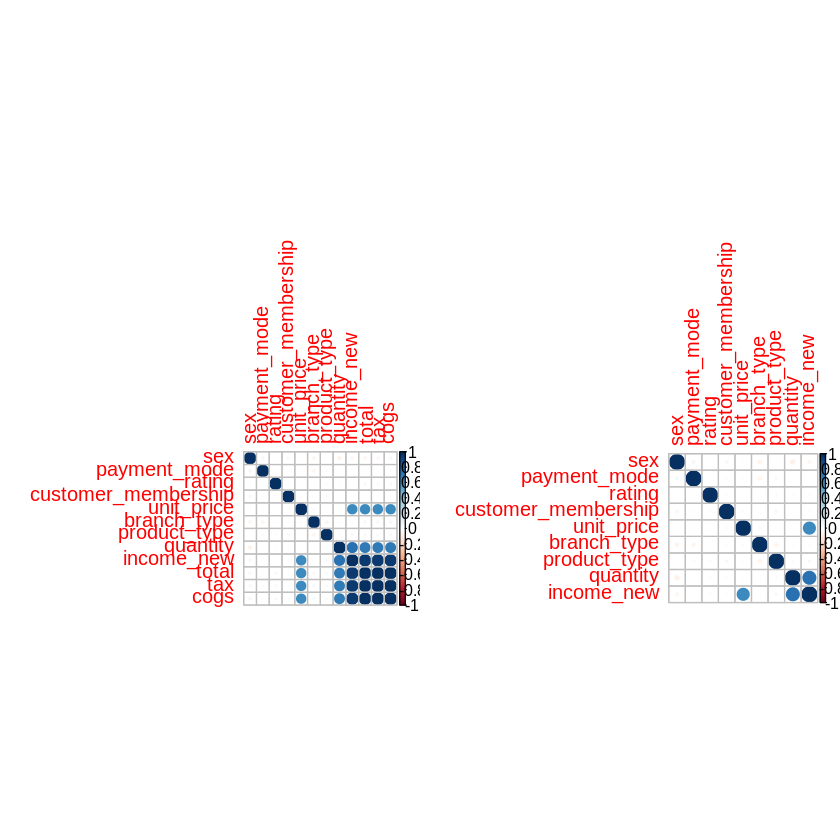

In [244]:
# Performing our graphical comparison
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(Data2), order = "hclust")

**Observation**: The redundant features having been removed the remaining most important feature are income_new,unit_price and quantity.

##### Wrapper Method

In [245]:
# clustvarsel package that contains an implementation of wrapper methods
# The clustvarsel function will implement variable section methodology 
# for model-based clustering to find the optimal subset of variables in a dataset.
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)


Loading required package: mclust

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map


Package 'clustvarsel' version 2.3.3

Type 'citation("clustvarsel")' for citing this R package in publications.



In [246]:
# Installing and loading our mclust package
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

In [247]:
# Sequential forward greedy search (default)
out = clustvarsel(numeric_df[,-c(5)], G = 1:5)
out


------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step   BICclust Model G   BICdiff Decision
      product_type          Add  -3521.631     E 5  408.3674 Accepted
       branch_type          Add  -5530.063   VEI 3  439.5779 Accepted
          quantity          Add -10701.378   VEI 5 -175.1074 Rejected
       branch_type       Remove  -3498.098     E 5  416.0449 Rejected

Selected subset: product_type, branch_type

**Observation**:The selection algorithm would indicate that the subset to be used for the clustering model is composed of variables product_type and branc_type and that other variables should be rejected.Having identified the variables that we use, we proceed to build the clustering model:

In [249]:
Subset1 = numeric_df[,-c(5)][,out$subset]
mod = Mclust(Subset1, G = 1:5)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 3 components: 

 log-likelihood    n df       BIC       ICL
      -2723.585 1000 12 -5530.063 -5531.496

Clustering table:
  1   2   3 
216 660 124 

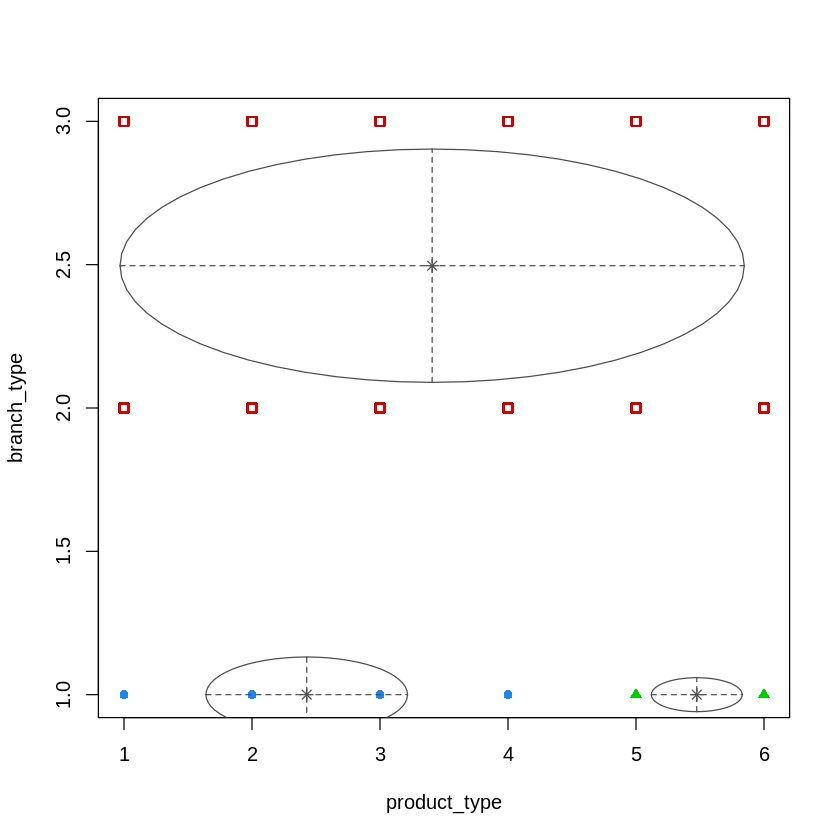

In [250]:
plot(mod,c("classification"))

##### Embedded Methods

In [251]:
# the ewkm function from the wskm package will be used.
# This is a weighted subspace clustering algorithm that is well suited to very high dimensional data.
# install and load our wskm package
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

Loading required package: latticeExtra


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer


Loading required package: fpc



In [253]:
set.seed(2)
model <- ewkm(numeric_df[,-c(5)], 3, lambda=2, maxiter=1000)

In [254]:
# Loading and installing our cluster package
# ---
#
suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")

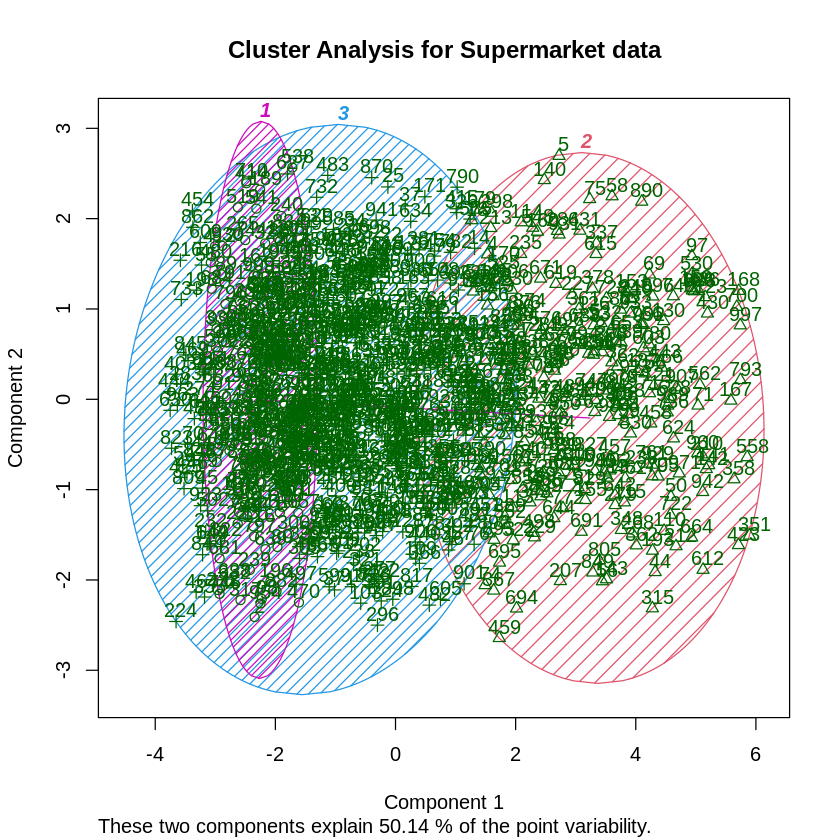

In [255]:
# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(numeric_df[,-c(5)], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis for Supermarket data')

In [256]:
# Weights are calculated for each variable and cluster. 
# They are a measure of the relative importance of each variable 
# with regards to the membership of the observations to that cluster. 
# The weights are incorporated into the distance function, 
# typically reducing the distance for more important variables.
# Weights remain stored in the model and we can check them as follows:
# 
round(model$weights*100,2)

unit_price quantity tax cogs rating total sex   customer_membership
1 0          0        0   0    0      0      0.03  0.02              
2 0          0        0   0    0      0     50.00 50.00              
3 0          0        0   0    0      0     45.37 54.63              
  product_type payment_mode branch_type income_new
1 0            0            0           99.94     
2 0            0            0            0.00     
3 0            0            0            0.00

**Observation**: For this method of feature selection the transformed income column, sex and customer membership are the mst important variables.

##### Feature Ranking

In [257]:
# the FSelector Package will be used which contains functions for selecting attributes
# installing and loading the required packages
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [259]:
# From the FSelector package, the correlation coefficient as a unit of valuation is used. 
# This would be one of the several algorithms contained 
# in the FSelector package that can be used rank the variables.
 
Scores <- linear.correlation(total~., numeric_df[,-c(5)])
Scores

attr_importance
unit_price          0.63396209     
quantity            0.70551019     
tax                 1.00000000     
cogs                1.00000000     
rating              0.03644170     
sex                 0.04945099     
customer_membership 0.01967028     
product_type        0.03162072     
payment_mode        0.01243364     
branch_type         0.04104666     
income_new          0.95633787

In [260]:
# From the output above, we observe a list containing 
# rows of variables on the left and score on the right. 
# In order to make a decision, we define a cutoff 
# i.e. suppose we want to use the top 5 representative variables, 
# through the use of the cutoff.k function included in the FSelector package. 
# Alternatively, we could define our cutoff visually 
# but in cases where there are few variables than in high dimensional datasets.
# 
# cutoff.k: The algorithms select a subset from a ranked attributes. 
# ---
#
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset    
1 tax       
2 cogs      
3 income_new
4 quantity  
5 unit_price

In [261]:
# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.
# ---
#
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2   
1 tax       
2 cogs      
3 income_new
4 quantity

In [262]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach as shown below;
# ---
# 
Scores2 <- information.gain(total~., numeric_df[,-c(5)])

In [263]:
# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)

Subset3   
1 tax       
2 cogs      
3 income_new
4 quantity  
5 unit_price

**Observation**: From the output above the few selected features are tax,cogs,income_new, quantity and the unit price.

## Challenging the solution

Since the main objective of the analysis is to come up with strategies that will enable the marketing department realise increased sales, attributes such as the age, geographical location,marital status and even the level of education of the customer could be included in the data.
In understanding the buying habits of customers,market segmentation is of utmost importance to enable customize the product so as to suit the insatiable needs of the consumers.

## Conclusion

It is evident that dimensionality reduction and feature scaling are important in when it comes in analyzing high dimesional data as they both seek to come up with variable that best explain the data.
However, It is important to note that feature scaling subsets the relevant features whereas dimensionality reduction output a combination of the dataset that best explains the dataset. 

## Recommendation

Looking at the last output in feature selection the recommendation to the marketing department would be to:
* look into the tax that is imposed on the product which will not only affect the prodcution costs but it also reduce the demand as the goods will exorbitant
*  cost of goods should be given utmost consideration by ensuring that there is a balance of the cost used in production enough for profits to be earned.
*  factor in the purchasing power of the consumers by always putting in mind the income that the customers earns directly dictates the purchasing habits.
*  look into the unit price of the commodities and ensure that the price is fair and reasonable.